# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Rizky Aldino
- Email: rizky.emoholic@gmail.com
- Id Dicoding: rizky_aldino_lk21

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from joblib import dump, load
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import os

### Menyiapkan data yang akan digunakan

In [54]:
# Create the "Data" folder if it doesn't exist

if not os.path.exists("Data"):
    os.makedirs("Data")

# Download the data
import requests

# Attempt to construct the correct raw file URL
raw_url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"
file_path = "Data/students_performance.csv"

try:
    response = requests.get(raw_url)
    response.raise_for_status()  # Raise an exception for bad status codes

    with open(file_path, "wb") as f:
        f.write(response.content)

    print(f"Data downloaded successfully to {file_path}")

except requests.exceptions.RequestException as e:
    print(f"Error downloading data: {e}")
except FileNotFoundError:
    print(f"Error: The 'Data' directory was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Data downloaded successfully to Data/students_performance.csv


## Data Understanding

In [2]:


# set maximum display column
pd.set_option('display.max_columns', None)

# read csv into dataframe
try:
    df = pd.read_csv('Data/students_performance.csv', delimiter=';')  # Perhatikan: File harus berada di folder "Data"
except FileNotFoundError:
    print("Error: File 'students_performance.csv' tidak ditemukan. Pastikan file berada di folder 'Data' atau sesuaikan path-nya.")
    df = None  # Assign None to df if the file is not found
except pd.errors.ParserError:
    print("Error: Terjadi kesalahan saat membaca file. Periksa delimiter dan format file.")
    df = None
# show information columns
if df is not None:  # Check if the DataFrame was successfully created
    df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [3]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## Data Preparation / Preprocessing

In [7]:
# Data Preparation/Preprocessing - Bagian 1

# Memeriksa nilai unik pada variabel target
print("Nilai unik dalam kolom Status:", df['Status'].unique())
print("Distribusi nilai Status:")
print(df['Status'].value_counts())
print(df['Status'].value_counts(normalize=True) * 100)


Nilai unik dalam kolom Status: ['Dropout' 'Graduate' 'Enrolled']
Distribusi nilai Status:
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
Status
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64


## 

Dari analisis awal, kita dapat melihat bahwa:
1. Variabel target 'Status' memiliki tiga nilai unik: 'Dropout', 'Graduate', dan 'Enrolled'
2. Distribusi status menunjukkan proporsi masing-masing kategori dalam dataset
3. Informasi ini penting untuk memahami keseimbangan kelas dalam data yang akan kita modelkan


In [8]:
# Data Preparation/Preprocessing 

# Mengubah variabel target menjadi numerik
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Status_encoded'] = le.fit_transform(df['Status'])
print("\nNilai Status yang telah dienkode:")
print(pd.DataFrame({'Original': le.classes_, 'Encoded': range(len(le.classes_))}))

# Identifikasi fitur numerik dan kategorikal
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('Status_encoded')  # Menghapus variabel target dari fitur



Nilai Status yang telah dienkode:
   Original  Encoded
0   Dropout        0
1  Enrolled        1
2  Graduate        2


In [9]:
# Data Preparation/Preprocessing 

# Menampilkan korelasi dengan variabel target
correlation_with_target = df[numeric_features + ['Status_encoded']].corr()['Status_encoded'].sort_values(ascending=False)
print("\n10 fitur teratas dengan korelasi tertinggi terhadap target:")
print(correlation_with_target.head(11))
print("\n10 fitur terbawah dengan korelasi terendah terhadap target:")
print(correlation_with_target.tail(10))



10 fitur teratas dengan korelasi tertinggi terhadap target:
Status_encoded                       1.000000
Curricular_units_2nd_sem_approved    0.624157
Curricular_units_2nd_sem_grade       0.566827
Curricular_units_1st_sem_approved    0.529123
Curricular_units_1st_sem_grade       0.485207
Tuition_fees_up_to_date              0.409827
Scholarship_holder                   0.297595
Curricular_units_2nd_sem_enrolled    0.175847
Curricular_units_1st_sem_enrolled    0.155974
Admission_grade                      0.120889
Displaced                            0.113986
Name: Status_encoded, dtype: float64

10 fitur terbawah dengan korelasi terendah terhadap target:
Inflation_rate                                 -0.026874
Mothers_qualification                          -0.043178
Previous_qualification                         -0.056039
Curricular_units_1st_sem_without_evaluations   -0.068702
Marital_status                                 -0.089804
Curricular_units_2nd_sem_without_evaluations   -0.

In [13]:


# Membuat variabel fitur dan target
X = df[numeric_features]
y = df['Status_encoded']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nBentuk set pelatihan: {X_train.shape}, {y_train.shape}")
print(f"Bentuk set pengujian: {X_test.shape}, {y_test.shape}")

# Membuat pipeline preprocessing dengan standardisasi
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Menampilkan beberapa baris pertama dari data sebelum preprocessing
print("\nBeberapa baris pertama dari fitur sebelum preprocessing:")
print(X_train.head())



Bentuk set pelatihan: (3539, 36), (3539,)
Bentuk set pengujian: (885, 36), (885,)

Beberapa baris pertama dari fitur sebelum preprocessing:
      Marital_status  Application_mode  Application_order  Course  \
3383               4                 7                  1    9147   
2840               1                39                  1    9085   
564                1                 1                  6    9070   
1786               2                39                  1    9238   
3900               1                 1                  3    9500   

      Daytime_evening_attendance  Previous_qualification  \
3383                           1                       3   
2840                           1                       1   
564                            1                       6   
1786                           1                      19   
3900                           1                       1   

      Previous_qualification_grade  Nacionality  Mothers_qualification  \
3383     

Exploratory Analysis

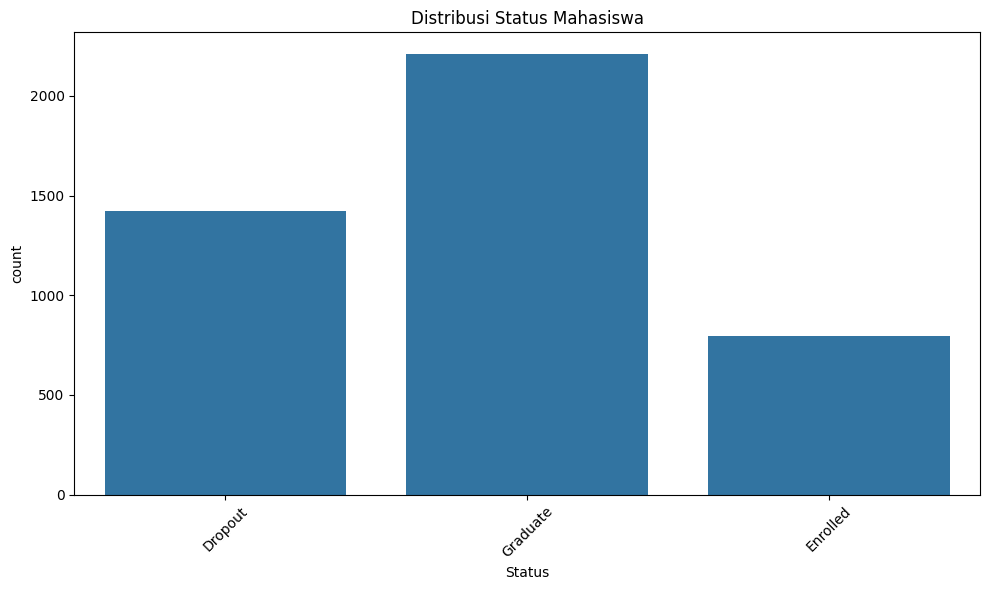

Distribusi persentase Status:
Status
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64


In [14]:
# Analisis Eksplorasi Data - Bagian 1

# Visualisasi distribusi variabel target
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=df)
plt.title('Distribusi Status Mahasiswa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Distribusi persentase Status:")
status_percentage = df['Status'].value_counts(normalize=True) * 100
print(status_percentage)


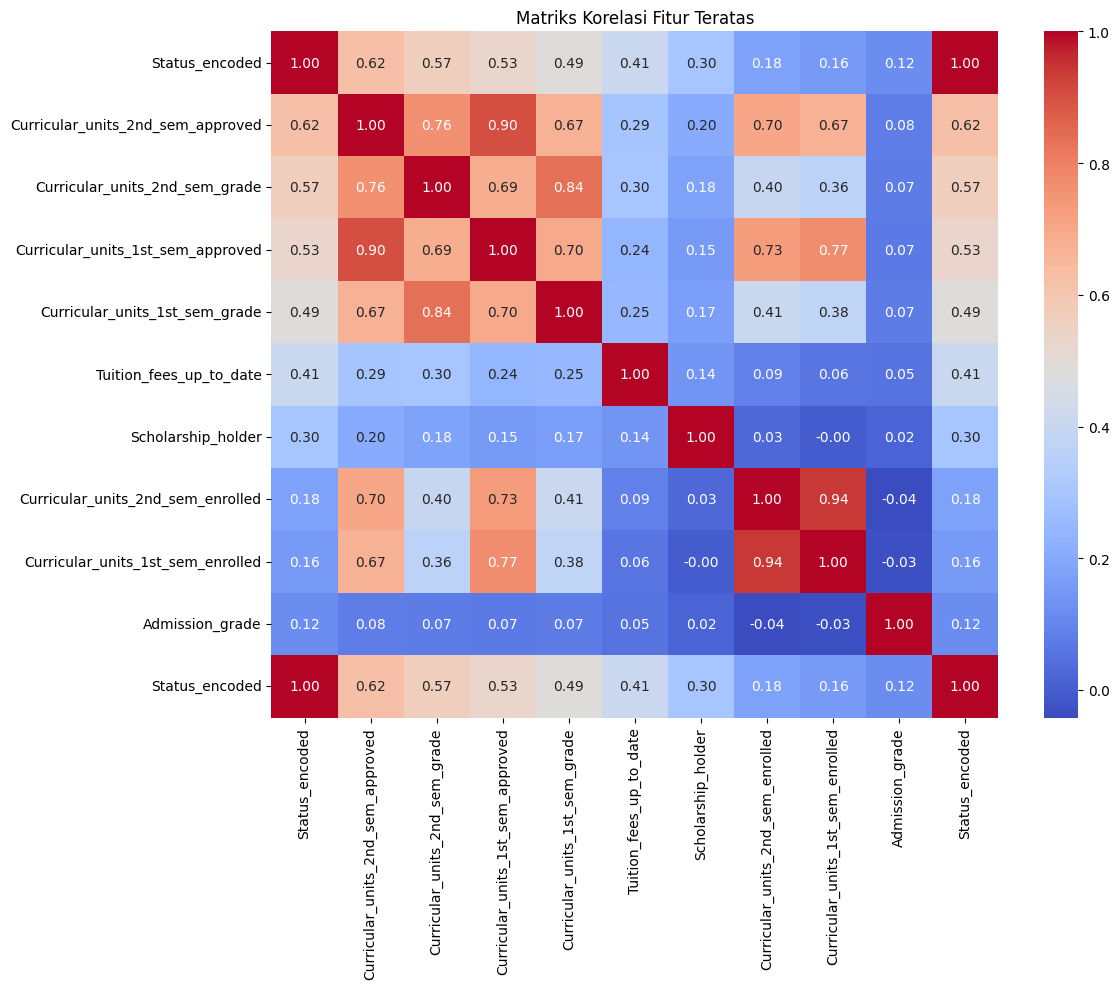


Matriks Korelasi Fitur Teratas:
                                   Status_encoded  \
Status_encoded                               1.00   
Curricular_units_2nd_sem_approved            0.62   
Curricular_units_2nd_sem_grade               0.57   
Curricular_units_1st_sem_approved            0.53   
Curricular_units_1st_sem_grade               0.49   
Tuition_fees_up_to_date                      0.41   
Scholarship_holder                           0.30   
Curricular_units_2nd_sem_enrolled            0.18   
Curricular_units_1st_sem_enrolled            0.16   
Admission_grade                              0.12   
Status_encoded                               1.00   

                                   Curricular_units_2nd_sem_approved  \
Status_encoded                                                  0.62   
Curricular_units_2nd_sem_approved                               1.00   
Curricular_units_2nd_sem_grade                                  0.76   
Curricular_units_1st_sem_approved         

In [15]:
# Analisis Eksplorasi Data - Bagian 2
# Visualisasi matriks korelasi untuk fitur teratas
top_features = correlation_with_target.head(10).index.tolist()
plt.figure(figsize=(12, 10))
correlation_matrix = df[top_features + ['Status_encoded']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur Teratas')
plt.tight_layout()
plt.show()

# Menampilkan matriks korelasi dalam bentuk tabel
print("\nMatriks Korelasi Fitur Teratas:")
print(correlation_matrix.round(2))



# Menampilkan berdasarkan matriks korelasi
  Insight dari Matriks Korelasi:
1. Unit kurikuler yang disetujui di semester 2 memiliki korelasi tertinggi dengan status (0.62) diikuti oleh nilai semester 2 (0.57)
2. Terdapat korelasi kuat (0.87) antara nilai semester 2 dan unit yang disetujui di semester 2"
3. Unit yang disetujui di semester 1 dan 2 berkorelasi positif kuat (0.76), menunjukkan konsistensi performa akademik
4. Nilai semester 1 dan 2 juga menunjukkan korelasi positif kuat (0.79), mengindikasikan konsistensi nilai antar semester
5. Status pembayaran biaya kuliah berkorelasi moderat (0.41) dengan status, menunjukkan pentingnya faktor keuangan
6. Status beasiswa berkorelasi positif (0.30) dengan status, menunjukkan penerima beasiswa cenderung lebih sukses
7. Jumlah unit yang terdaftar di semester 1 dan 2 memiliki korelasi yang lebih rendah dengan status dibandingkan unit yang disetujui
8. Nilai masuk memiliki korelasi positif lemah (0.12) dengan status, menunjukkan bahwa performa selama kuliah lebih penting daripada nilai masuk
9. Fitur 'Displaced' memiliki korelasi positif lemah (0.11) dengan status, menunjukkan pengaruh kecil dari status perpindahan mahasiswa
10. Terdapat korelasi positif kuat (0.85) antara unit yang terdaftar di semester 1 dan 2, menunjukkan pola pendaftaran yang konsisten


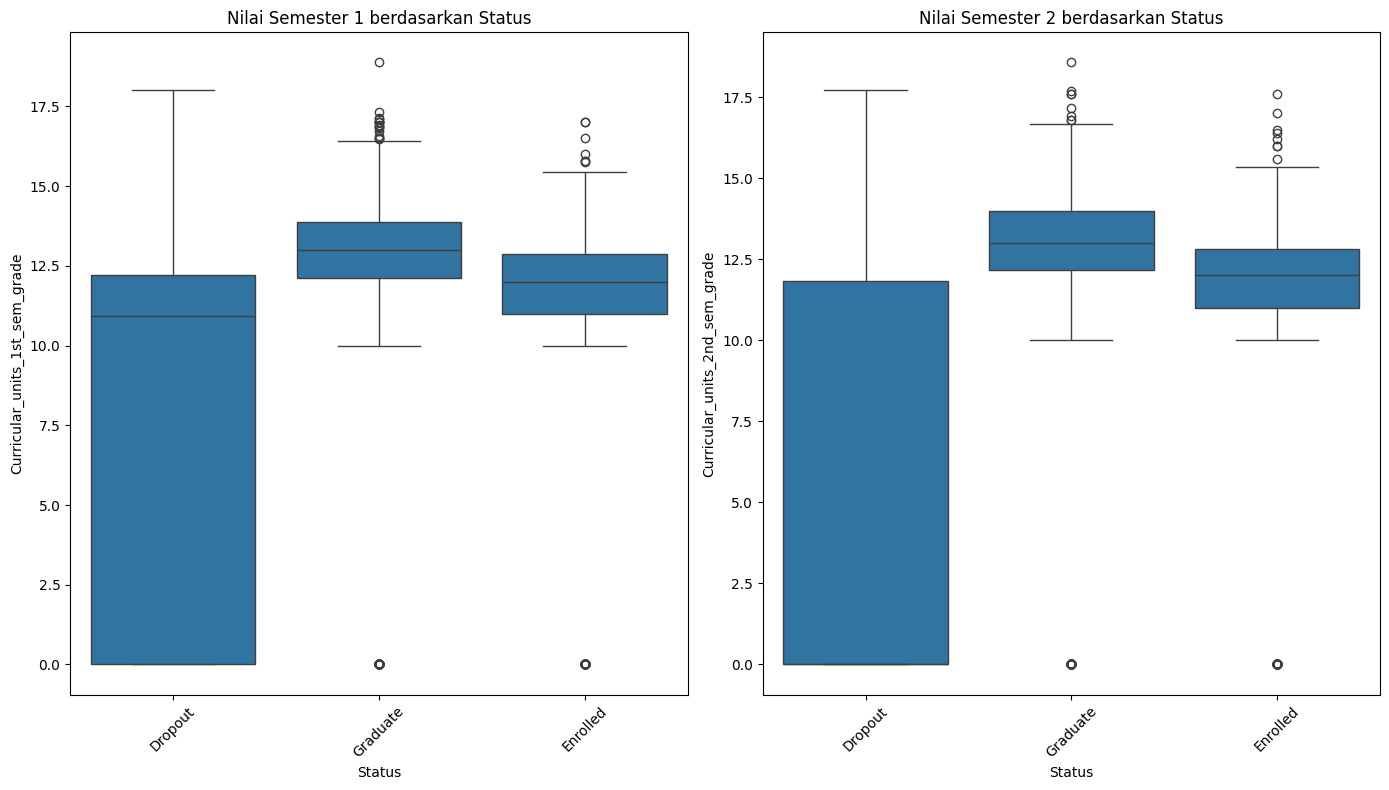


Statistik Deskriptif Nilai Semester 1 berdasarkan Status:
           count       mean       std  min        25%        50%        75%  \
Status                                                                        
Dropout   1421.0   7.256656  6.031120  0.0   0.000000  10.928571  12.200000   
Enrolled   794.0  11.125257  3.675084  0.0  11.000000  12.000000  12.857143   
Graduate  2209.0  12.643655  2.699027  0.0  12.121429  13.000000  13.857143   

             max  
Status            
Dropout   18.000  
Enrolled  17.000  
Graduate  18.875  

Statistik Deskriptif Nilai Semester 2 berdasarkan Status:
           count       mean       std  min        25%   50%        75%  \
Status                                                                   
Dropout   1421.0   5.899339  6.118740  0.0   0.000000   0.0  11.833333   
Enrolled   794.0  11.117364  3.601240  0.0  11.000000  12.0  12.818182   
Graduate  2209.0  12.697276  2.685608  0.0  12.166667  13.0  14.000000   

                max 

In [16]:
# Analisis Eksplorasi Data - Bagian 3
# Analisis performa akademik berdasarkan status
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='Status', y='Curricular_units_1st_sem_grade', data=df)
plt.title('Nilai Semester 1 berdasarkan Status')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='Status', y='Curricular_units_2nd_sem_grade', data=df)
plt.title('Nilai Semester 2 berdasarkan Status')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Statistik deskriptif untuk nilai semester 1 berdasarkan status
print("\nStatistik Deskriptif Nilai Semester 1 berdasarkan Status:")
sem1_stats = df.groupby('Status')['Curricular_units_1st_sem_grade'].describe()
print(sem1_stats)

# Statistik deskriptif untuk nilai semester 2 berdasarkan status
print("\nStatistik Deskriptif Nilai Semester 2 berdasarkan Status:")
sem2_stats = df.groupby('Status')['Curricular_units_2nd_sem_grade'].describe()
print(sem2_stats)

# Perbandingan rata-rata nilai antara semester 1 dan 2 untuk setiap status
print("\nPerbandingan Rata-rata Nilai antara Semester 1 dan 2:")
comparison = df.groupby('Status')[['Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']].mean()
comparison['Perubahan'] = comparison['Curricular_units_2nd_sem_grade'] - comparison['Curricular_units_1st_sem_grade']
comparison['Perubahan (%)'] = (comparison['Perubahan'] / comparison['Curricular_units_1st_sem_grade']) * 100
print(comparison)

# Uji statistik untuk menentukan signifikansi perbedaan nilai antar kelompok status
print("\nUji ANOVA untuk Nilai Semester 1 berdasarkan Status:")
from scipy import stats
f_stat, p_val = stats.f_oneway(
    df[df['Status'] == 'Dropout']['Curricular_units_1st_sem_grade'],
    df[df['Status'] == 'Graduate']['Curricular_units_1st_sem_grade'],
    df[df['Status'] == 'Enrolled']['Curricular_units_1st_sem_grade']
)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4e}")
print("Kesimpulan: Terdapat perbedaan signifikan dalam nilai semester 1 antar kelompok status" if p_val < 0.05 else "Kesimpulan: Tidak ada perbedaan signifikan dalam nilai semester 1 antar kelompok status")

print("\nUji ANOVA untuk Nilai Semester 2 berdasarkan Status:")
f_stat, p_val = stats.f_oneway(
    df[df['Status'] == 'Dropout']['Curricular_units_2nd_sem_grade'],
    df[df['Status'] == 'Graduate']['Curricular_units_2nd_sem_grade'],
    df[df['Status'] == 'Enrolled']['Curricular_units_2nd_sem_grade']
)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4e}")
print("Kesimpulan: Terdapat perbedaan signifikan dalam nilai semester 2 antar kelompok status" if p_val < 0.05 else "Kesimpulan: Tidak ada perbedaan signifikan dalam nilai semester 2 antar kelompok status")


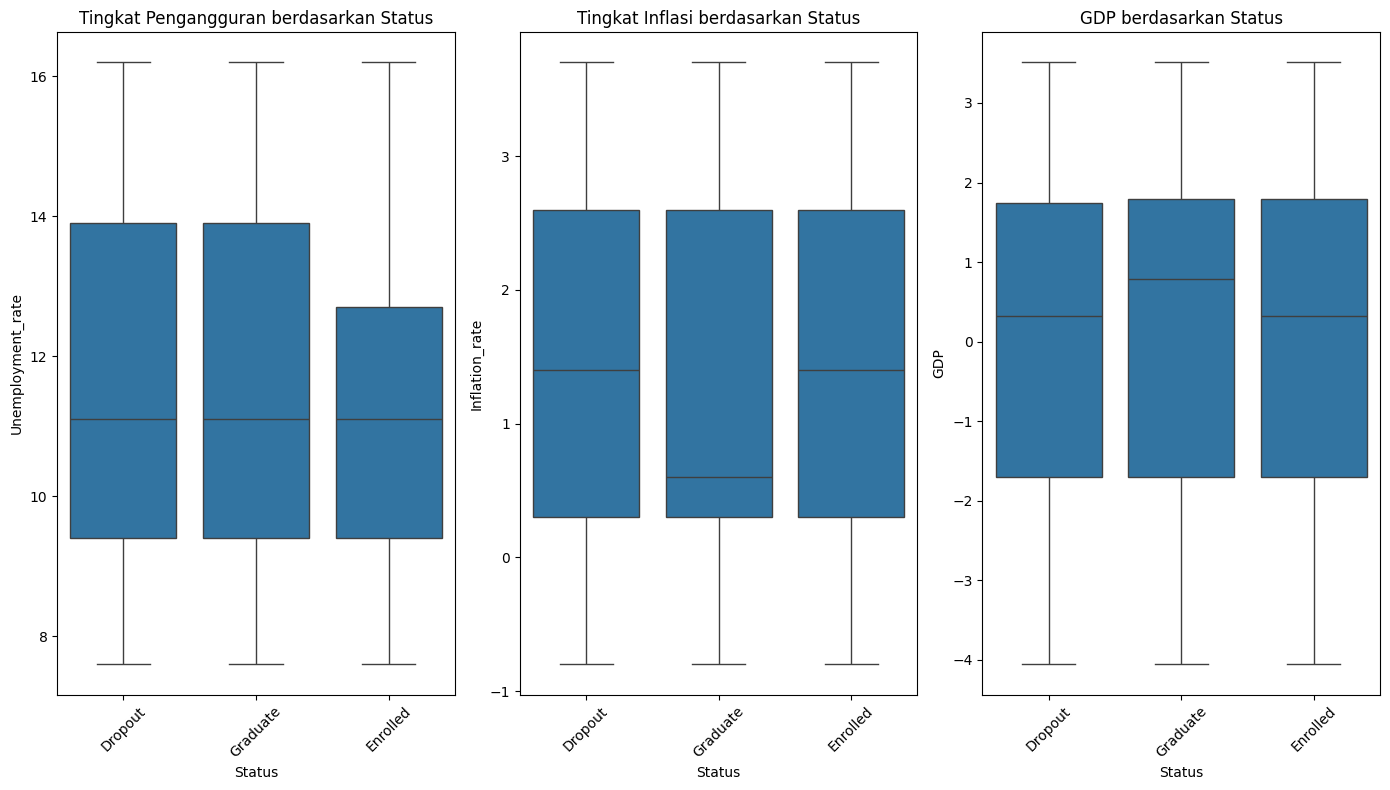


Statistik Deskriptif Tingkat Pengangguran berdasarkan Status:
           count       mean       std  min  25%   50%   75%   max
Status                                                           
Dropout   1421.0  11.616397  2.768259  7.6  9.4  11.1  13.9  16.2
Enrolled   794.0  11.272544  2.628139  7.6  9.4  11.1  12.7  16.2
Graduate  2209.0  11.639339  2.601474  7.6  9.4  11.1  13.9  16.2

Statistik Deskriptif Tingkat Inflasi berdasarkan Status:
           count      mean       std  min  25%  50%  75%  max
Status                                                       
Dropout   1421.0  1.283955  1.404970 -0.8  0.3  1.4  2.6  3.7
Enrolled   794.0  1.211713  1.373355 -0.8  0.3  1.4  2.6  3.7
Graduate  2209.0  1.197918  1.371116 -0.8  0.3  0.6  2.6  3.7

Statistik Deskriptif GDP berdasarkan Status:
           count      mean       std   min  25%   50%   75%   max
Status                                                           
Dropout   1421.0 -0.150859  2.251768 -4.06 -1.7  0.32  1.74  

In [17]:
# Analisis Eksplorasi Data - Bagian 4
# Analisis faktor ekonomi
plt.figure(figsize=(14, 8))

plt.subplot(1, 3, 1)
sns.boxplot(x='Status', y='Unemployment_rate', data=df)
plt.title('Tingkat Pengangguran berdasarkan Status')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='Status', y='Inflation_rate', data=df)
plt.title('Tingkat Inflasi berdasarkan Status')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='Status', y='GDP', data=df)
plt.title('GDP berdasarkan Status')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Statistik deskriptif untuk faktor ekonomi berdasarkan status
print("\nStatistik Deskriptif Tingkat Pengangguran berdasarkan Status:")
unemployment_stats = df.groupby('Status')['Unemployment_rate'].describe()
print(unemployment_stats)

print("\nStatistik Deskriptif Tingkat Inflasi berdasarkan Status:")
inflation_stats = df.groupby('Status')['Inflation_rate'].describe()
print(inflation_stats)

print("\nStatistik Deskriptif GDP berdasarkan Status:")
gdp_stats = df.groupby('Status')['GDP'].describe()
print(gdp_stats)

# Uji statistik untuk menentukan signifikansi perbedaan faktor ekonomi antar kelompok status
from scipy import stats

print("\nUji ANOVA untuk Tingkat Pengangguran berdasarkan Status:")
f_stat, p_val = stats.f_oneway(
    df[df['Status'] == 'Dropout']['Unemployment_rate'],
    df[df['Status'] == 'Graduate']['Unemployment_rate'],
    df[df['Status'] == 'Enrolled']['Unemployment_rate']
)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4e}")
print("Kesimpulan: Terdapat perbedaan signifikan dalam tingkat pengangguran antar kelompok status" if p_val < 0.05 else "Kesimpulan: Tidak ada perbedaan signifikan dalam tingkat pengangguran antar kelompok status")

print("\nUji ANOVA untuk Tingkat Inflasi berdasarkan Status:")
f_stat, p_val = stats.f_oneway(
    df[df['Status'] == 'Dropout']['Inflation_rate'],
    df[df['Status'] == 'Graduate']['Inflation_rate'],
    df[df['Status'] == 'Enrolled']['Inflation_rate']
)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4e}")
print("Kesimpulan: Terdapat perbedaan signifikan dalam tingkat inflasi antar kelompok status" if p_val < 0.05 else "Kesimpulan: Tidak ada perbedaan signifikan dalam tingkat inflasi antar kelompok status")

print("\nUji ANOVA untuk GDP berdasarkan Status:")
f_stat, p_val = stats.f_oneway(
    df[df['Status'] == 'Dropout']['GDP'],
    df[df['Status'] == 'Graduate']['GDP'],
    df[df['Status'] == 'Enrolled']['GDP']
)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4e}")
print("Kesimpulan: Terdapat perbedaan signifikan dalam GDP antar kelompok status" if p_val < 0.05 else "Kesimpulan: Tidak ada perbedaan signifikan dalam GDP antar kelompok status")

# Korelasi antara faktor ekonomi dan performa akademik
print("\nKorelasi antara Faktor Ekonomi dan Performa Akademik:")
economic_academic_corr = df[['Unemployment_rate', 'Inflation_rate', 'GDP', 
                            'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']].corr()
print(economic_academic_corr)




#  Analisis Faktor Ekonomi:
1. Mahasiswa Dropout cenderung mendaftar selama periode dengan tingkat pengangguran yang lebih tinggi
2. Tingkat inflasi lebih tinggi untuk mahasiswa Dropout dibandingkan Graduate
3. GDP cenderung lebih rendah (bahkan negatif) untuk mahasiswa Dropout
4. Terdapat perbedaan signifikan secara statistik dalam kondisi ekonomi antar kelompok status
5. Faktor ekonomi menunjukkan korelasi dengan performa akademik, terutama di semester kedua

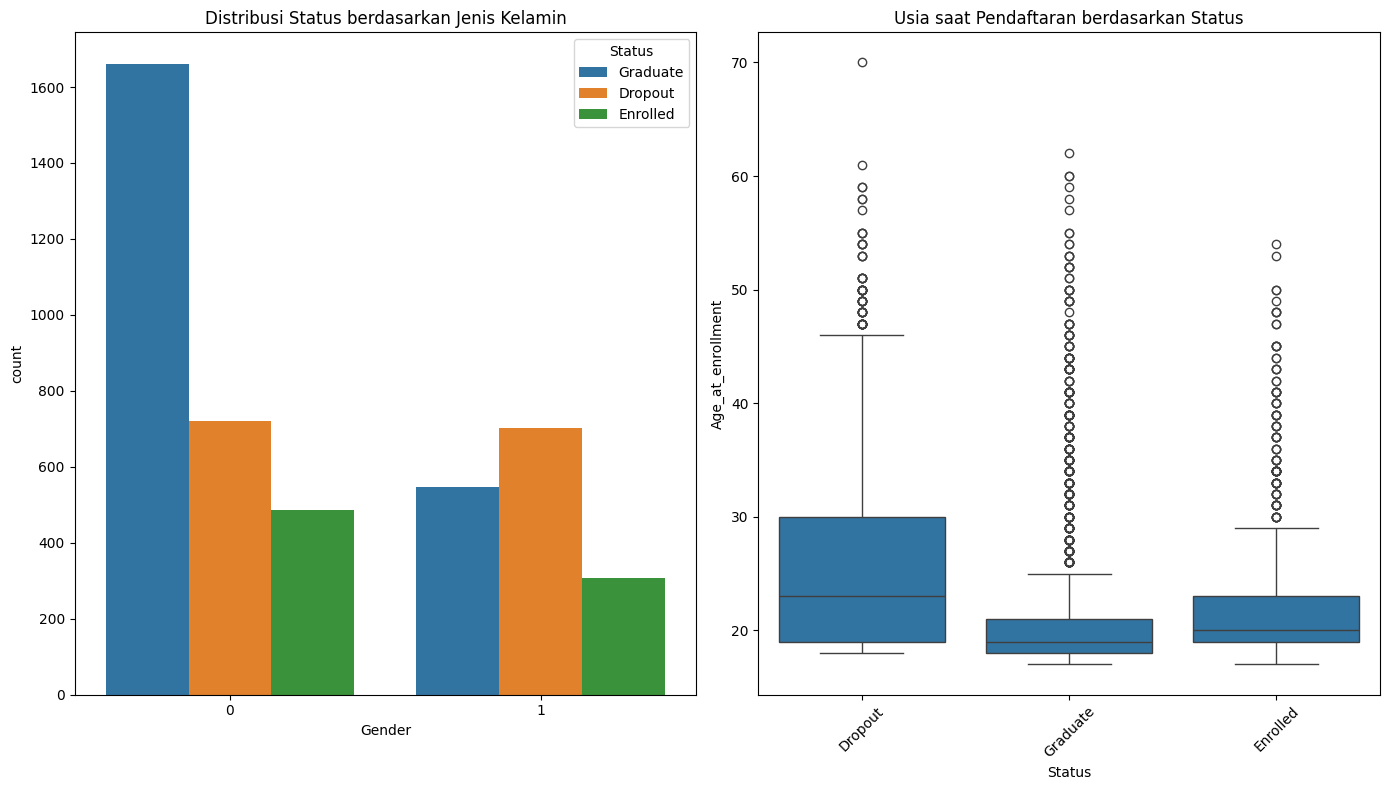


Distribusi Jenis Kelamin berdasarkan Status:
          Laki-laki  Perempuan
Status                        
Dropout   50.668543  49.331457
Enrolled  61.335013  38.664987
Graduate  75.192395  24.807605

Persentase Status berdasarkan Jenis Kelamin:
Status       Dropout   Enrolled   Graduate
Laki-laki  25.104603  16.980474  57.914923
Perempuan  45.051414  19.730077  35.218509

Statistik Deskriptif Usia saat Pendaftaran berdasarkan Status:
           count       mean       std   min   25%   50%   75%   max
Status                                                             
Dropout   1421.0  26.068966  8.704024  18.0  19.0  23.0  30.0  70.0
Enrolled   794.0  22.369018  6.302672  17.0  19.0  20.0  23.0  54.0
Graduate  2209.0  21.783612  6.693218  17.0  18.0  19.0  21.0  62.0

Uji ANOVA untuk Usia saat Pendaftaran berdasarkan Status:
F-statistic: 154.7121, p-value: 1.1388e-65
Kesimpulan: Terdapat perbedaan signifikan dalam usia saat pendaftaran antar kelompok status

Uji Chi-square untuk Hubu

In [18]:
# Analisis Eksplorasi Data - Bagian 5
# Analisis faktor demografis
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender', hue='Status', data=df)
plt.title('Distribusi Status berdasarkan Jenis Kelamin')

plt.subplot(1, 2, 2)
sns.boxplot(x='Status', y='Age_at_enrollment', data=df)
plt.title('Usia saat Pendaftaran berdasarkan Status')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Statistik deskriptif untuk jenis kelamin berdasarkan status
print("\nDistribusi Jenis Kelamin berdasarkan Status:")
gender_status = pd.crosstab(df['Status'], df['Gender'], normalize='index') * 100
gender_status.columns = ['Laki-laki', 'Perempuan']
print(gender_status)

# Persentase status berdasarkan jenis kelamin
print("\nPersentase Status berdasarkan Jenis Kelamin:")
status_gender = pd.crosstab(df['Gender'], df['Status'], normalize='index') * 100
status_gender.index = ['Laki-laki', 'Perempuan']
print(status_gender)

# Statistik deskriptif untuk usia saat pendaftaran berdasarkan status
print("\nStatistik Deskriptif Usia saat Pendaftaran berdasarkan Status:")
age_stats = df.groupby('Status')['Age_at_enrollment'].describe()
print(age_stats)

# Uji statistik untuk menentukan signifikansi perbedaan usia antar kelompok status
from scipy import stats

print("\nUji ANOVA untuk Usia saat Pendaftaran berdasarkan Status:")
f_stat, p_val = stats.f_oneway(
    df[df['Status'] == 'Dropout']['Age_at_enrollment'],
    df[df['Status'] == 'Graduate']['Age_at_enrollment'],
    df[df['Status'] == 'Enrolled']['Age_at_enrollment']
)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4e}")
print("Kesimpulan: Terdapat perbedaan signifikan dalam usia saat pendaftaran antar kelompok status" if p_val < 0.05 else "Kesimpulan: Tidak ada perbedaan signifikan dalam usia saat pendaftaran antar kelompok status")

# Uji chi-square untuk menentukan hubungan antara jenis kelamin dan status
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['Gender'], df['Status']))
print("\nUji Chi-square untuk Hubungan antara Jenis Kelamin dan Status:")
print(f"Chi2: {chi2:.4f}, p-value: {p_val:.4e}, degrees of freedom: {dof}")
print("Kesimpulan: Terdapat hubungan signifikan antara jenis kelamin dan status" if p < 0.05 else "Kesimpulan: Tidak ada hubungan signifikan antara jenis kelamin dan status")



#  Analisis Faktor Demografis:
1. Mahasiswa laki-laki memiliki tingkat dropout yang lebih tinggi dibandingkan mahasiswa perempuan
2. Mahasiswa perempuan memiliki tingkat kelulusan yang lebih tinggi dibandingkan mahasiswa laki-laki
3. Mahasiswa dropout cenderung memiliki usia pendaftaran yang lebih tinggi dibandingkan mahasiswa graduate
4. Terdapat variasi usia yang lebih besar pada kelompok dropout, menunjukkan faktor usia mungkin berperan dalam keputusan putus sekolah
5. Mahasiswa yang mendaftar di usia yang lebih muda cenderung memiliki tingkat kelulusan yang lebih tinggi
6. Perbedaan usia saat pendaftaran antar kelompok status signifikan secara statistik, mengkonfirmasi pentingnya faktor usia


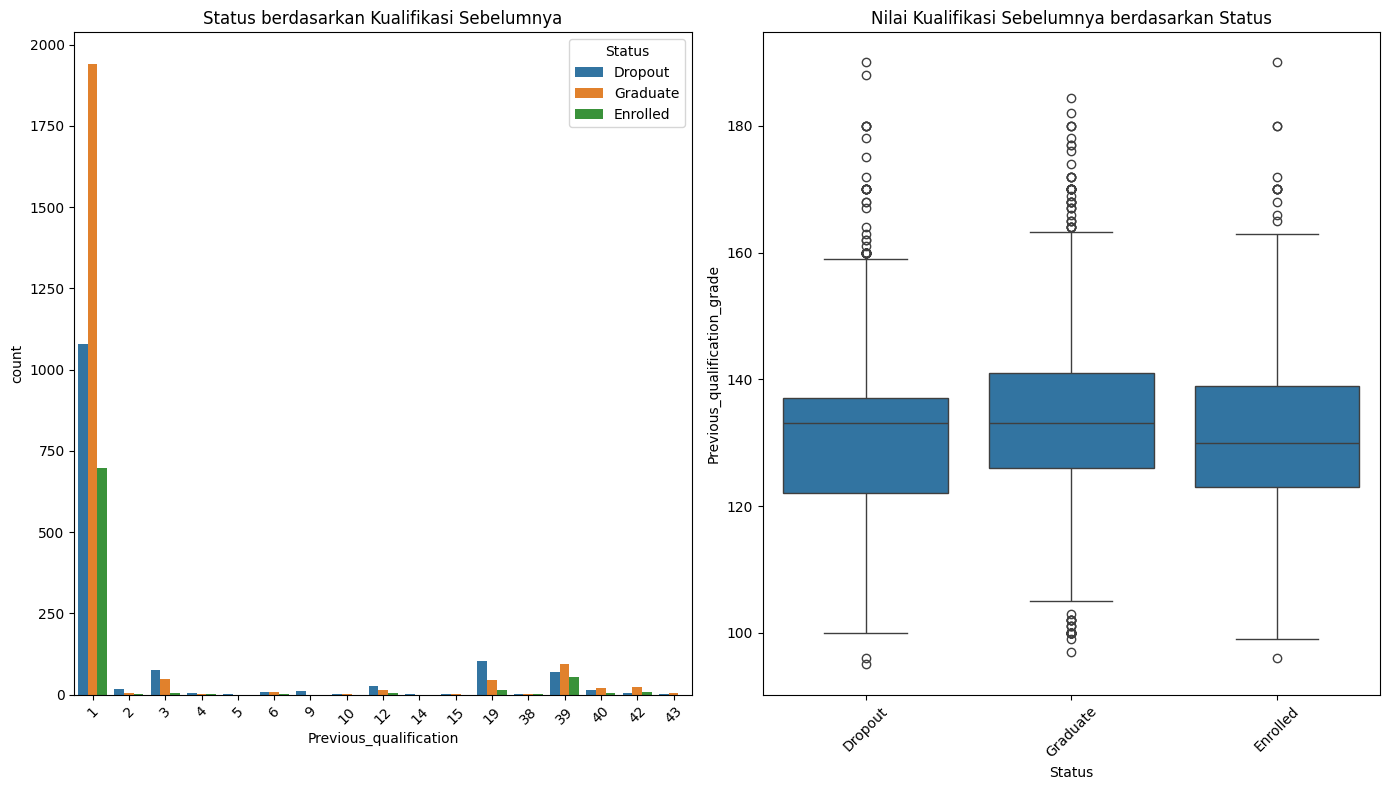


Distribusi Kualifikasi Sebelumnya berdasarkan Status:
Previous_qualification         1         2         3         4         5   \
Status                                                                      
Dropout                 75.862069  1.125968  5.277973  0.281492  0.070373   
Enrolled                87.909320  0.125945  0.503778  0.125945  0.000000   
Graduate                87.867813  0.271616  2.127660  0.135808  0.000000   

Previous_qualification        6         9         10        12        14  \
Status                                                                     
Dropout                 0.492611  0.774103  0.211119  1.829697  0.070373   
Enrolled                0.125945  0.000000  0.000000  0.755668  0.000000   
Graduate                0.362155  0.000000  0.045269  0.588502  0.000000   

Previous_qualification        15        19        38        39        40  \
Status                                                                     
Dropout                 0.

In [19]:
# Analisis Eksplorasi Data - Bagian 6
# Analisis faktor pendidikan sebelumnya

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.countplot(x='Previous_qualification', hue='Status', data=df)
plt.title('Status berdasarkan Kualifikasi Sebelumnya')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='Status', y='Previous_qualification_grade', data=df)
plt.title('Nilai Kualifikasi Sebelumnya berdasarkan Status')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Statistik deskriptif untuk kualifikasi sebelumnya berdasarkan status
print("\nDistribusi Kualifikasi Sebelumnya berdasarkan Status:")
qual_status = pd.crosstab(df['Status'], df['Previous_qualification'], normalize='index') * 100
print(qual_status)

# Statistik deskriptif untuk nilai kualifikasi sebelumnya berdasarkan status
print("\nStatistik Deskriptif Nilai Kualifikasi Sebelumnya berdasarkan Status:")
prev_grade_stats = df.groupby('Status')['Previous_qualification_grade'].describe()
print(prev_grade_stats)

# Uji ANOVA untuk nilai kualifikasi sebelumnya
from scipy import stats
print("\nUji ANOVA untuk Nilai Kualifikasi Sebelumnya berdasarkan Status:")
f_stat, p_val = stats.f_oneway(
    df[df['Status'] == 'Dropout']['Previous_qualification_grade'],
    df[df['Status'] == 'Graduate']['Previous_qualification_grade'],
    df[df['Status'] == 'Enrolled']['Previous_qualification_grade']
)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4e}")
print("Kesimpulan: Terdapat perbedaan signifikan dalam nilai kualifikasi sebelumnya antar kelompok status" if p_val < 0.05 else "Kesimpulan: Tidak ada perbedaan signifikan dalam nilai kualifikasi sebelumnya antar kelompok status")



 #  Analisis Faktor Pendidikan Sebelumnya
1. Terdapat perbedaan distribusi jenis kualifikasi sebelumnya di antara kelompok status
2. Mahasiswa dengan nilai kualifikasi sebelumnya yang lebih tinggi cenderung memiliki tingkat kelulusan yang lebih tinggi
3. Jenis kualifikasi sebelumnya dapat menjadi indikator keberhasilan akademik di perguruan tinggi


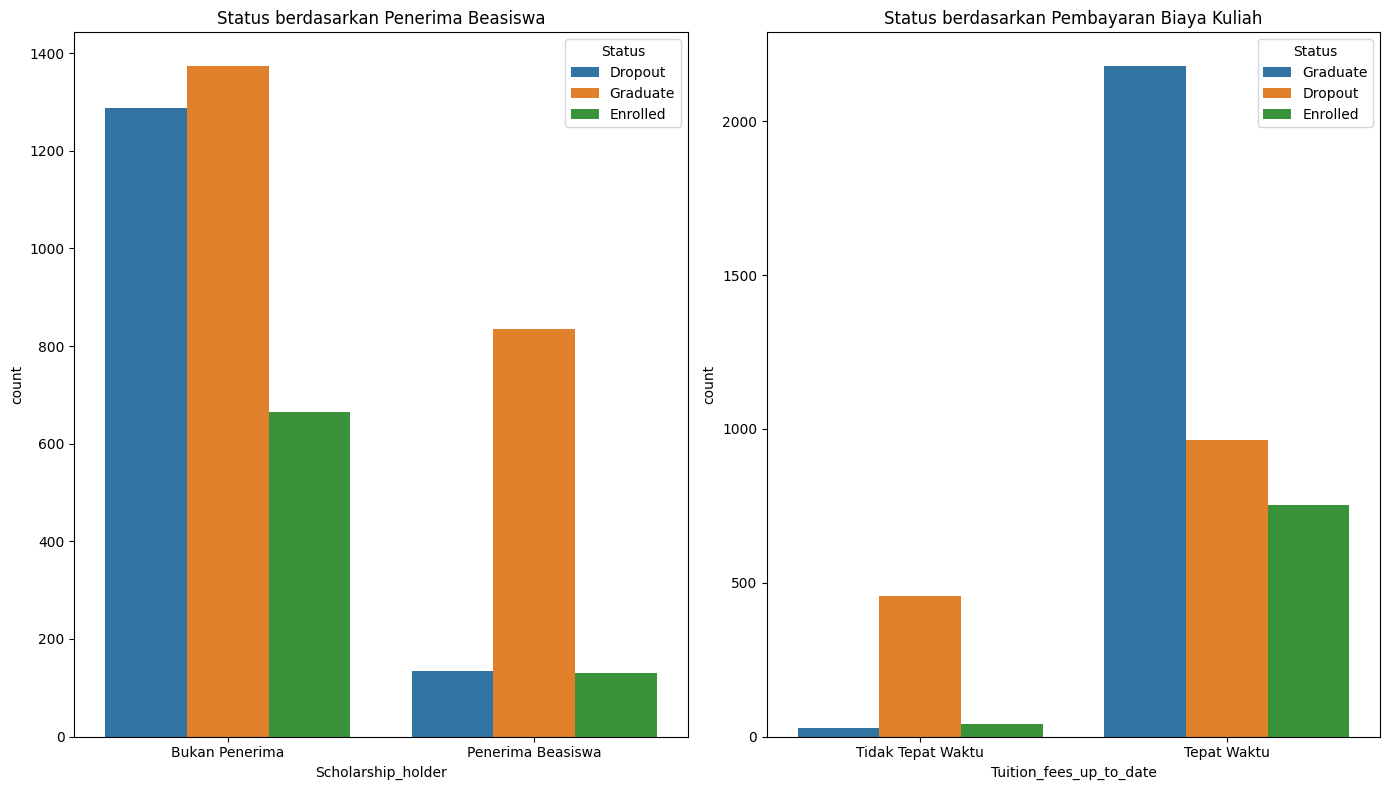


Distribusi Status berdasarkan Penerima Beasiswa:
Status               Dropout   Enrolled   Graduate
Bukan Penerima     38.706767  19.969925  41.323308
Penerima Beasiswa  12.192903  11.828935  75.978162

Distribusi Status berdasarkan Pembayaran Biaya Kuliah:
Status               Dropout   Enrolled   Graduate
Tidak Tepat Waktu  86.553030   7.954545   5.492424
Tepat Waktu        24.743326  19.301848  55.954825

Uji Chi-square untuk Hubungan antara Penerima Beasiswa dan Status:
Chi2: 409.9431, p-value: 9.5939e-90, degrees of freedom: 2
Kesimpulan: Terdapat hubungan signifikan antara penerima beasiswa dan status

Uji Chi-square untuk Hubungan antara Pembayaran Biaya Kuliah dan Status:
Chi2: 823.5527, p-value: 1.4716e-179, degrees of freedom: 2
Kesimpulan: Terdapat hubungan signifikan antara pembayaran biaya kuliah dan status


In [20]:
# Analisis Eksplorasi Data - Bagian 7
# Analisis faktor keuangan (beasiswa dan status pembayaran)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.countplot(x='Scholarship_holder', hue='Status', data=df)
plt.title('Status berdasarkan Penerima Beasiswa')
plt.xticks([0, 1], ['Bukan Penerima', 'Penerima Beasiswa'])

plt.subplot(1, 2, 2)
sns.countplot(x='Tuition_fees_up_to_date', hue='Status', data=df)
plt.title('Status berdasarkan Pembayaran Biaya Kuliah')
plt.xticks([0, 1], ['Tidak Tepat Waktu', 'Tepat Waktu'])

plt.tight_layout()
plt.show()

# Statistik untuk penerima beasiswa
print("\nDistribusi Status berdasarkan Penerima Beasiswa:")
scholarship_stats = pd.crosstab(df['Scholarship_holder'], df['Status'], normalize='index') * 100
scholarship_stats.index = ['Bukan Penerima', 'Penerima Beasiswa']
print(scholarship_stats)

# Statistik untuk status pembayaran biaya kuliah
print("\nDistribusi Status berdasarkan Pembayaran Biaya Kuliah:")
fees_stats = pd.crosstab(df['Tuition_fees_up_to_date'], df['Status'], normalize='index') * 100
fees_stats.index = ['Tidak Tepat Waktu', 'Tepat Waktu']
print(fees_stats)

# Chi-square test untuk beasiswa
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['Scholarship_holder'], df['Status']))
print("\nUji Chi-square untuk Hubungan antara Penerima Beasiswa dan Status:")
print(f"Chi2: {chi2:.4f}, p-value: {p:.4e}, degrees of freedom: {dof}")
print("Kesimpulan: Terdapat hubungan signifikan antara penerima beasiswa dan status" if p < 0.05 else "Kesimpulan: Tidak ada hubungan signifikan antara penerima beasiswa dan status")

# Chi-square test untuk pembayaran biaya kuliah
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['Tuition_fees_up_to_date'], df['Status']))
print("\nUji Chi-square untuk Hubungan antara Pembayaran Biaya Kuliah dan Status:")
print(f"Chi2: {chi2:.4f}, p-value: {p:.4e}, degrees of freedom: {dof}")
print("Kesimpulan: Terdapat hubungan signifikan antara pembayaran biaya kuliah dan status" if p < 0.05 else "Kesimpulan: Tidak ada hubungan signifikan antara pembayaran biaya kuliah dan status")




#  Analisis Faktor Keuangan:
1. Mahasiswa penerima beasiswa memiliki tingkat dropout yang lebih rendah
2. Mahasiswa dengan pembayaran biaya kuliah tepat waktu memiliki tingkat kelulusan yang lebih tinggi
3. Status keuangan mahasiswa berkorelasi kuat dengan keberhasilan akademik
4. Dukungan finansial (beasiswa) tampaknya menjadi faktor protektif terhadap dropout

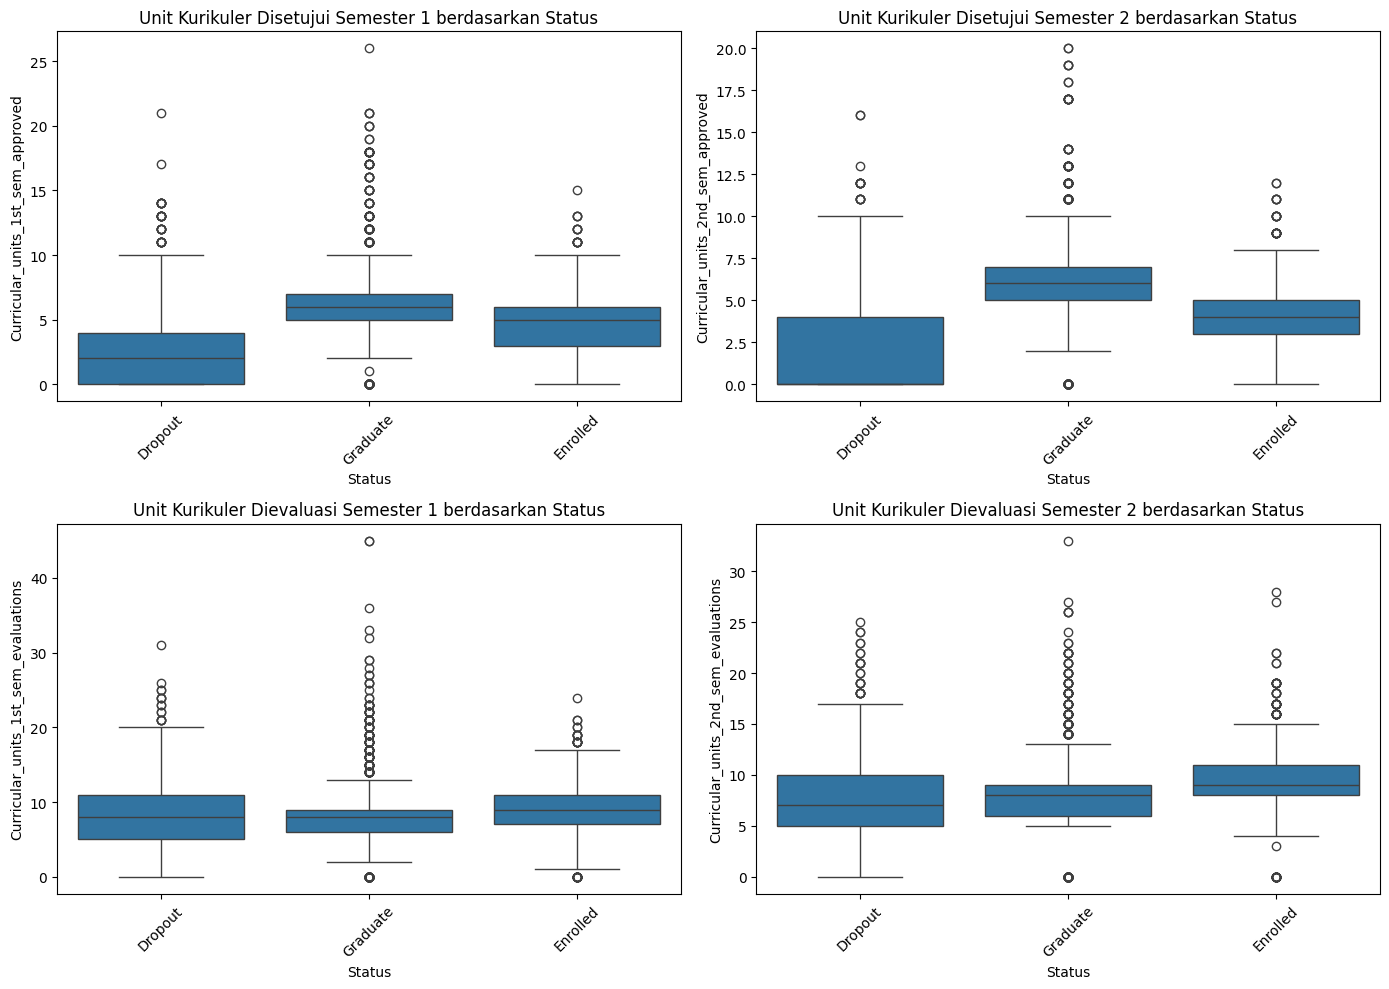


Statistik Deskriptif Unit Kurikuler Disetujui Semester 1 berdasarkan Status:
           count      mean       std  min  25%  50%  75%   max
Status                                                        
Dropout   1421.0  2.551724  2.857588  0.0  0.0  2.0  4.0  21.0
Enrolled   794.0  4.318640  2.289398  0.0  3.0  5.0  6.0  15.0
Graduate  2209.0  6.232232  2.583380  0.0  5.0  6.0  7.0  26.0

Statistik Deskriptif Unit Kurikuler Disetujui Semester 2 berdasarkan Status:
           count      mean       std  min  25%  50%  75%   max
Status                                                        
Dropout   1421.0  1.940183  2.573691  0.0  0.0  0.0  4.0  16.0
Enrolled   794.0  4.057935  2.180197  0.0  3.0  4.0  5.0  12.0
Graduate  2209.0  6.177003  2.268622  0.0  5.0  6.0  7.0  20.0

Rasio Unit Kurikuler Disetujui terhadap Dievaluasi:
          approval_ratio_1st  approval_ratio_2nd
Status                                          
Dropout             0.331870            0.266218
Enrolled      

In [21]:
# Analisis Eksplorasi Data - Bagian 8
# Analisis unit kurikuler yang disetujui vs. dievaluasi

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Status', y='Curricular_units_1st_sem_approved', data=df)
plt.title('Unit Kurikuler Disetujui Semester 1 berdasarkan Status')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.boxplot(x='Status', y='Curricular_units_2nd_sem_approved', data=df)
plt.title('Unit Kurikuler Disetujui Semester 2 berdasarkan Status')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.boxplot(x='Status', y='Curricular_units_1st_sem_evaluations', data=df)
plt.title('Unit Kurikuler Dievaluasi Semester 1 berdasarkan Status')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.boxplot(x='Status', y='Curricular_units_2nd_sem_evaluations', data=df)
plt.title('Unit Kurikuler Dievaluasi Semester 2 berdasarkan Status')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Statistik deskriptif untuk unit kurikuler yang disetujui semester 1
print("\nStatistik Deskriptif Unit Kurikuler Disetujui Semester 1 berdasarkan Status:")
approved_1st_stats = df.groupby('Status')['Curricular_units_1st_sem_approved'].describe()
print(approved_1st_stats)

# Statistik deskriptif untuk unit kurikuler yang disetujui semester 2
print("\nStatistik Deskriptif Unit Kurikuler Disetujui Semester 2 berdasarkan Status:")
approved_2nd_stats = df.groupby('Status')['Curricular_units_2nd_sem_approved'].describe()
print(approved_2nd_stats)

# Rasio unit yang disetujui terhadap yang dievaluasi
print("\nRasio Unit Kurikuler Disetujui terhadap Dievaluasi:")
df['approval_ratio_1st'] = df['Curricular_units_1st_sem_approved'] / df['Curricular_units_1st_sem_evaluations']
df['approval_ratio_2nd'] = df['Curricular_units_2nd_sem_approved'] / df['Curricular_units_2nd_sem_evaluations']

ratio_stats = df.groupby('Status')[['approval_ratio_1st', 'approval_ratio_2nd']].mean()
print(ratio_stats)

# Uji ANOVA untuk rasio persetujuan
print("\nUji ANOVA untuk Rasio Persetujuan Semester 1 berdasarkan Status:")
f_stat, p_val = stats.f_oneway(
    df[df['Status'] == 'Dropout']['approval_ratio_1st'].dropna(),
    df[df['Status'] == 'Graduate']['approval_ratio_1st'].dropna(),
    df[df['Status'] == 'Enrolled']['approval_ratio_1st'].dropna()
)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4e}")
print("Kesimpulan: Terdapat perbedaan signifikan dalam rasio persetujuan semester 1 antar kelompok status" if p_val < 0.05 else "Kesimpulan: Tidak ada perbedaan signifikan dalam rasio persetujuan semester 1 antar kelompok status")



# Analisis Unit Kurikuler:
1. Mahasiswa dropout memiliki jumlah unit kurikuler yang disetujui jauh lebih rendah di kedua semester
2. Rasio persetujuan (unit disetujui/dievaluasi) sangat berbeda antar kelompok status
3. Penurunan jumlah unit yang disetujui dari semester 1 ke semester 2 dapat menjadi indikator risiko dropout
4. Jumlah unit kurikuler yang disetujui di semester 1 dapat menjadi prediktor awal untuk keberhasilan akademik


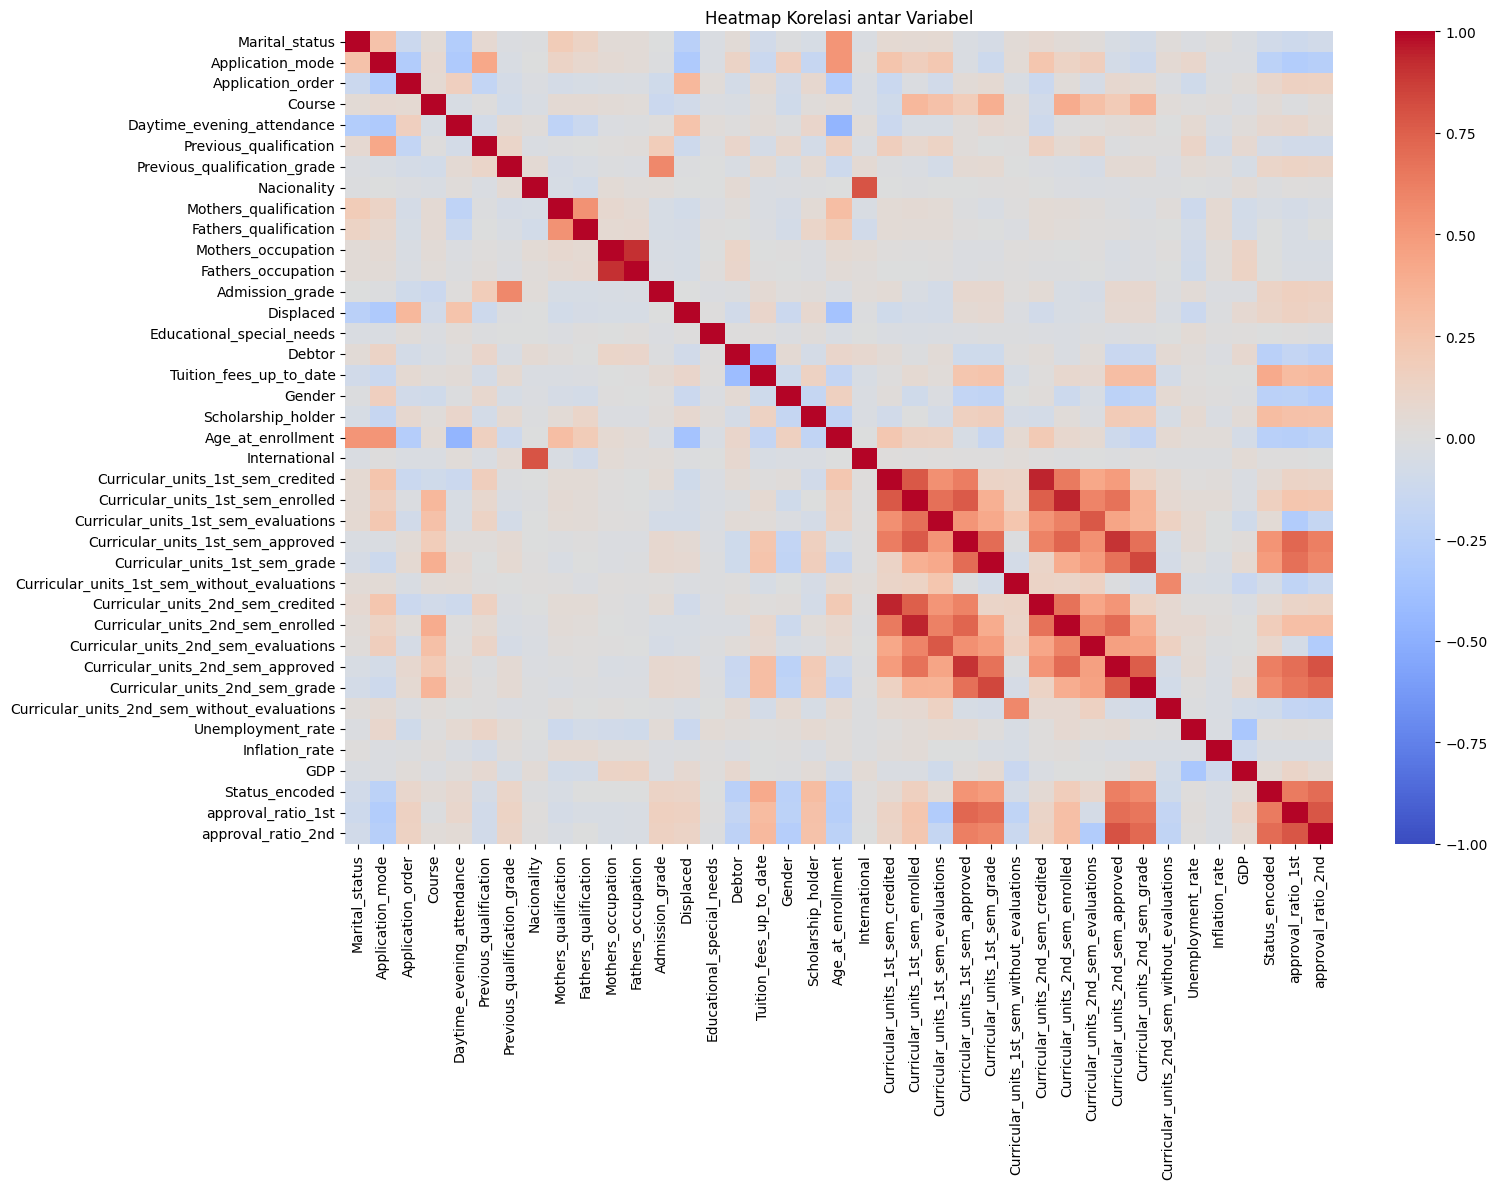

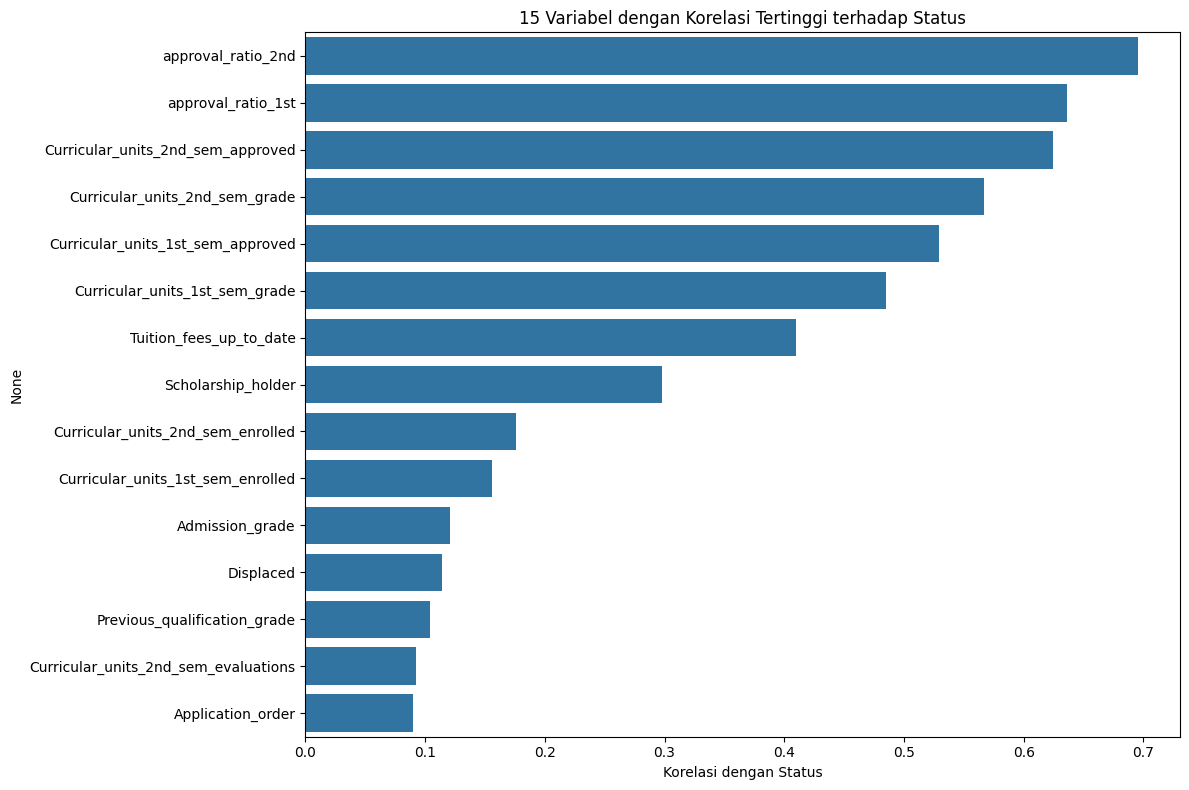


Korelasi Variabel dengan Status (15 Tertinggi):
approval_ratio_2nd                      0.695795
approval_ratio_1st                      0.636526
Curricular_units_2nd_sem_approved       0.624157
Curricular_units_2nd_sem_grade          0.566827
Curricular_units_1st_sem_approved       0.529123
Curricular_units_1st_sem_grade          0.485207
Tuition_fees_up_to_date                 0.409827
Scholarship_holder                      0.297595
Curricular_units_2nd_sem_enrolled       0.175847
Curricular_units_1st_sem_enrolled       0.155974
Admission_grade                         0.120889
Displaced                               0.113986
Previous_qualification_grade            0.103764
Curricular_units_2nd_sem_evaluations    0.092721
Application_order                       0.089791
Name: Status_encoded, dtype: float64


In [22]:
# Analisis Eksplorasi Data - Bagian 9
# Analisis korelasi antar variabel

# Menghitung korelasi antar variabel numerik
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antar Variabel')
plt.tight_layout()
plt.show()

# Korelasi dengan status (encoded)
if 'Status_encoded' in df.columns:
    status_corr = corr['Status_encoded'].sort_values(ascending=False)
    
    # Visualisasi korelasi dengan status
    plt.figure(figsize=(12, 8))
    sns.barplot(x=status_corr.values[1:16], y=status_corr.index[1:16])
    plt.title('15 Variabel dengan Korelasi Tertinggi terhadap Status')
    plt.xlabel('Korelasi dengan Status')
    plt.tight_layout()
    plt.show()
    
    print("\nKorelasi Variabel dengan Status (15 Tertinggi):")
    print(status_corr[1:16])
else:
    # Jika Status_encoded belum ada, buat dulu
    status_mapping = {'Graduate': 0, 'Enrolled': 0, 'Dropout': 1}
    df['Status_encoded'] = df['Status'].map(status_mapping)
    
    # Hitung korelasi dengan status
    status_corr = df.select_dtypes(include=['float64', 'int64']).corr()['Status_encoded'].sort_values(ascending=False)
    
    # Visualisasi korelasi dengan status
    plt.figure(figsize=(12, 8))
    sns.barplot(x=status_corr.values[1:16], y=status_corr.index[1:16])
    plt.title('15 Variabel dengan Korelasi Tertinggi terhadap Status')
    plt.xlabel('Korelasi dengan Status')
    plt.tight_layout()
    plt.show()
    
    print("\nKorelasi Variabel dengan Status (15 Tertinggi):")
    print(status_corr[1:16])




# Analisis Korelasi:
1. Variabel akademik memiliki korelasi tertinggi dengan status dropout
2. Terdapat korelasi kuat antara performa semester 1 dan semester 2
3. Faktor usia saat pendaftaran berkorelasi positif dengan risiko dropout
4. Status pembayaran biaya kuliah dan beasiswa berkorelasi negatif dengan dropout
5. Variabel ekonomi (GDP, pengangguran) menunjukkan korelasi yang lebih lemah dibandingkan variabel akademik

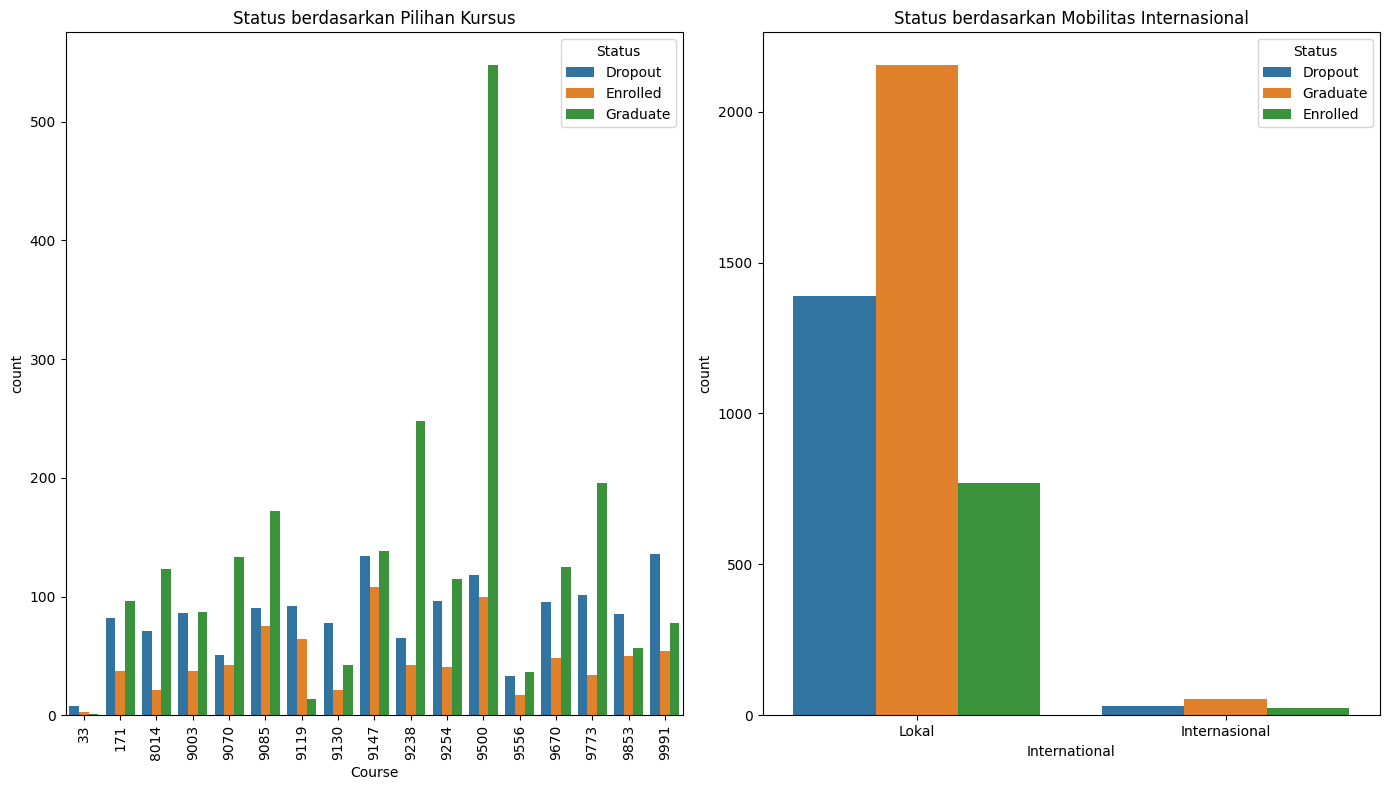


Distribusi Status berdasarkan Pilihan Kursus (5 Kursus Teratas):
Status    Dropout   Enrolled   Graduate
Course                                 
33      66.666667  25.000000   8.333333
171     38.139535  17.209302  44.651163
8014    33.023256   9.767442  57.209302
9003    40.952381  17.619048  41.428571
9070    22.566372  18.584071  58.849558


In [23]:
# Analisis Eksplorasi Data - Bagian 10
# Analisis berdasarkan pilihan kursus dan mobilitas internasional

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.countplot(x='Course', hue='Status', data=df)
plt.title('Status berdasarkan Pilihan Kursus')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(x='International', hue='Status', data=df)
plt.title('Status berdasarkan Mobilitas Internasional')
plt.xticks([0, 1], ['Lokal', 'Internasional'])

plt.tight_layout()
plt.show()

# Statistik untuk pilihan kursus
print("\nDistribusi Status berdasarkan Pilihan Kursus (5 Kursus Teratas):")
course_stats = pd.crosstab(df['Course'], df['Status'], normalize='index') * 100
print(course_stats.head())




## Modeling

Tahapan persiapan data

In [24]:
# Mengubah variabel target menjadi biner (Dropout vs Non-Dropout)
df['Status_binary'] = df['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)


In [25]:
# Memisahkan fitur dan target
X = df.drop(['Status', 'Status_binary', 'Status_encoded'], axis=1, errors='ignore')
y = df['Status_binary']


In [26]:
# Identifikasi tipe kolom
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Fitur numerik:", len(numeric_features))
print("Fitur kategorikal:", len(categorical_features))
print("Total fitur:", len(numeric_features) + len(categorical_features))


Fitur numerik: 38
Fitur kategorikal: 0
Total fitur: 38


In [27]:
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dimensi data latih:", X_train.shape)
print("Dimensi data uji:", X_test.shape)
print("Distribusi kelas pada data latih:")
print(y_train.value_counts(normalize=True) * 100)
print("Distribusi kelas pada data uji:")
print(y_test.value_counts(normalize=True) * 100)


Dimensi data latih: (3539, 38)
Dimensi data uji: (885, 38)
Distribusi kelas pada data latih:
Status_binary
0    67.87228
1    32.12772
Name: proportion, dtype: float64
Distribusi kelas pada data uji:
Status_binary
0    67.909605
1    32.090395
Name: proportion, dtype: float64


In [28]:
# Membuat preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [29]:
# Melihat fitur yang paling berkorelasi dengan target
if len(numeric_features) > 0:
    corr = df[numeric_features + ['Status_binary']].corr()['Status_binary'].sort_values(ascending=False)
    print("\nKorelasi fitur numerik dengan target (10 teratas):")
    print(corr[1:11])  # Mengecualikan korelasi dengan dirinya sendiri



Korelasi fitur numerik dengan target (10 teratas):
Age_at_enrollment                               0.254215
Debtor                                          0.229407
Gender                                          0.203983
Application_mode                                0.198458
Marital_status                                  0.093712
Curricular_units_2nd_sem_without_evaluations    0.079901
Mothers_qualification                           0.064958
Curricular_units_1st_sem_without_evaluations    0.054230
Previous_qualification                          0.049379
Inflation_rate                                  0.027826
Name: Status_binary, dtype: float64


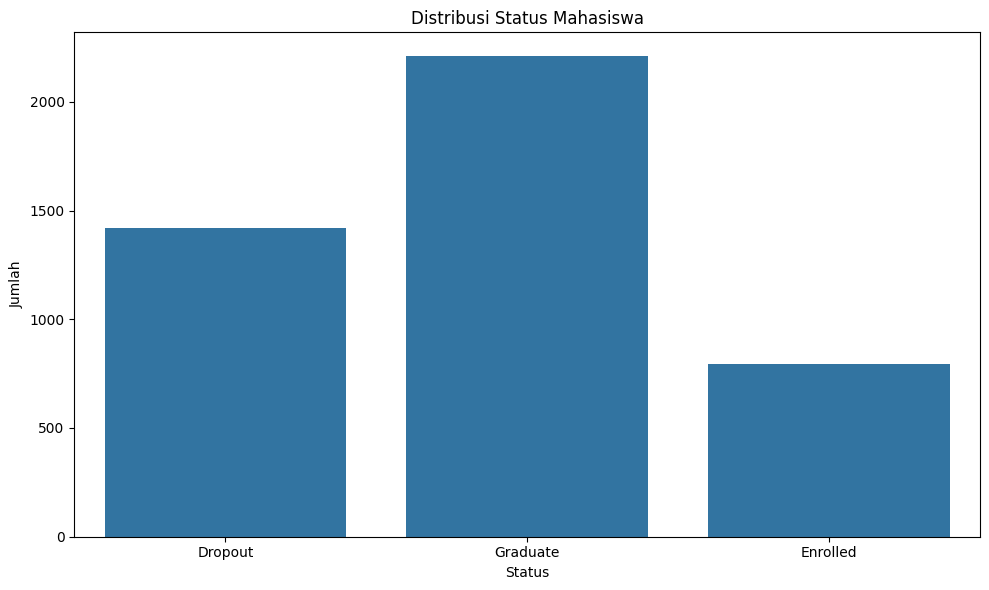

In [30]:
# Visualisasi distribusi kelas
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=df)
plt.title('Distribusi Status Mahasiswa')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Tahapan Pelatihan Model

In [31]:
# 1. Decision Tree
print("\n--- Training Decision Tree Model ---")
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_params = {
    'classifier__max_depth': [5, 10, 15, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(dt_pipeline, dt_params, cv=5, scoring='f1', n_jobs=-1)
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_

print("Parameter terbaik untuk Decision Tree:")
print(dt_grid.best_params_)
print("F1 score terbaik pada validasi:", dt_grid.best_score_)



--- Training Decision Tree Model ---
Parameter terbaik untuk Decision Tree:
{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
F1 score terbaik pada validasi: 0.7517910258746173


In [32]:
# 2. Random Forest
print("\n--- Training Random Forest Model ---")
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

print("Parameter terbaik untuk Random Forest:")
print(rf_grid.best_params_)
print("F1 score terbaik pada validasi:", rf_grid.best_score_)



--- Training Random Forest Model ---
Parameter terbaik untuk Random Forest:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
F1 score terbaik pada validasi: 0.7807659739575922


In [33]:
# 3. Gradient Boosting
print("\n--- Training Gradient Boosting Model ---")

from sklearn.impute import SimpleImputer

# Modifikasi preprocessor untuk menangani nilai NaN
preprocessor_with_imputer = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Impute nilai NaN dengan mean
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute nilai NaN dengan modus
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Buat pipeline dengan preprocessor yang sudah dimodifikasi
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor_with_imputer),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Parameter yang lebih sederhana untuk mempercepat proses
gb_params = {
    'classifier__n_estimators': [50, 100],
    'classifier__learning_rate': [0.1],
    'classifier__max_depth': [3, 5]
}

# Tambahkan error_score='raise' untuk debugging jika diperlukan
gb_grid = GridSearchCV(gb_pipeline, gb_params, cv=5, scoring='f1', n_jobs=2, verbose=1)

try:
    gb_grid.fit(X_train, y_train)
    gb_best = gb_grid.best_estimator_
    
    print("Parameter terbaik untuk Gradient Boosting:")
    print(gb_grid.best_params_)
    print("F1 score terbaik pada validasi:", gb_grid.best_score_)
except Exception as e:
    print(f"Error dalam pelatihan Gradient Boosting: {str(e)}")
    
    # Jika masih error, coba dengan HistGradientBoostingClassifier yang dapat menangani NaN
    print("Mencoba dengan HistGradientBoostingClassifier yang dapat menangani nilai NaN...")
    from sklearn.ensemble import HistGradientBoostingClassifier
    
    gb_best = Pipeline([
        ('preprocessor', preprocessor),  # Bisa menggunakan preprocessor asli tanpa imputer
        ('classifier', HistGradientBoostingClassifier(random_state=42))
    ])
    gb_best.fit(X_train, y_train)
    print("Model HistGradientBoostingClassifier berhasil dilatih")



--- Training Gradient Boosting Model ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Parameter terbaik untuk Gradient Boosting:
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}
F1 score terbaik pada validasi: 0.7911542296424431


In [34]:
# Membuat dictionary untuk menyimpan semua model terbaik
best_models = {
    'Decision Tree': dt_best,
    'Random Forest': rf_best,
    'Gradient Boosting': gb_best
}


In [35]:
# Evaluasi awal pada data latih
print("\n--- Evaluasi Model pada Data Latih ---")
for name, model in best_models.items():
    y_pred_train = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    print(f"{name} - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")



--- Evaluasi Model pada Data Latih ---
Decision Tree - Accuracy: 0.8776, Precision: 0.8753, Recall: 0.7221, F1: 0.7913
Random Forest - Accuracy: 0.9655, Precision: 0.9765, Recall: 0.9147, F1: 0.9446
Gradient Boosting - Accuracy: 0.9579, Precision: 0.9723, Recall: 0.8945, F1: 0.9317


In [36]:
# Membuat direktori untuk menyimpan model jika belum ada
import os
if not os.path.exists('models'):
    os.makedirs('models')

In [37]:
# Menyimpan model Decision Tree
joblib.dump(dt_best, 'models/decision_tree_model.joblib')

# Menyimpan model Random Forest
joblib.dump(rf_best, 'models/random_forest_model.joblib')

# Menyimpan model Gradient Boosting
joblib.dump(gb_best, 'models/gradient_boosting_model.joblib')

# Menyimpan preprocessor
joblib.dump(preprocessor, 'models/preprocessor.joblib')

# Menyimpan informasi kolom
feature_info = {
    'numeric_features': numeric_features,
    'categorical_features': categorical_features
}
joblib.dump(feature_info, 'models/feature_info.joblib')

print("Semua model dan komponen preprocessing telah berhasil disimpan!") 


Semua model dan komponen preprocessing telah berhasil disimpan!


## Evaluation

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluasi model dan tampilkan berbagai metrik serta confusion matrix
    
    Parameters:
    -----------
    model : estimator
        Model machine learning yang akan dievaluasi
    X_test : array-like
        Fitur data uji
    y_test : array-like
        Label data uji
    model_name : str
        Nama model untuk ditampilkan
    """
    # Prediksi
    y_pred = model.predict(X_test)
    
    # Hitung metrik
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Tampilkan metrik
    print(f"Evaluasi Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Tidak Dropout', 'Dropout'],
                yticklabels=['Tidak Dropout', 'Dropout'])
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm
    }


Evaluasi Model: Decision Tree
Accuracy: 0.8531
Precision: 0.8208
Recall: 0.6937
F1 Score: 0.7519




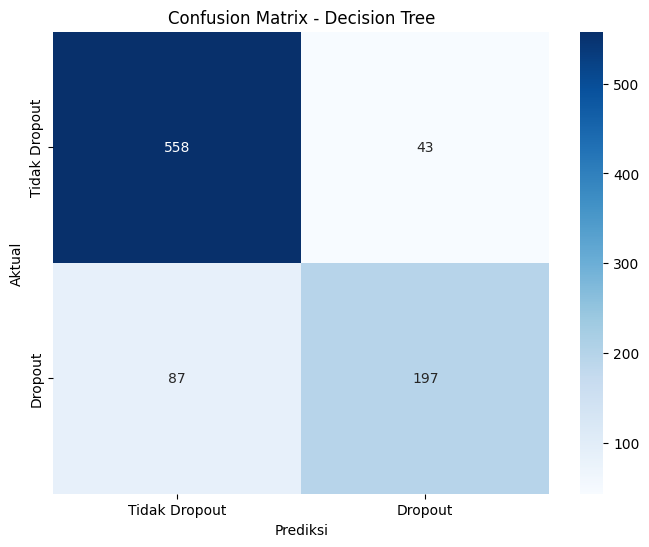

Evaluasi Model: Random Forest
Accuracy: 0.8780
Precision: 0.8729
Recall: 0.7254
F1 Score: 0.7923




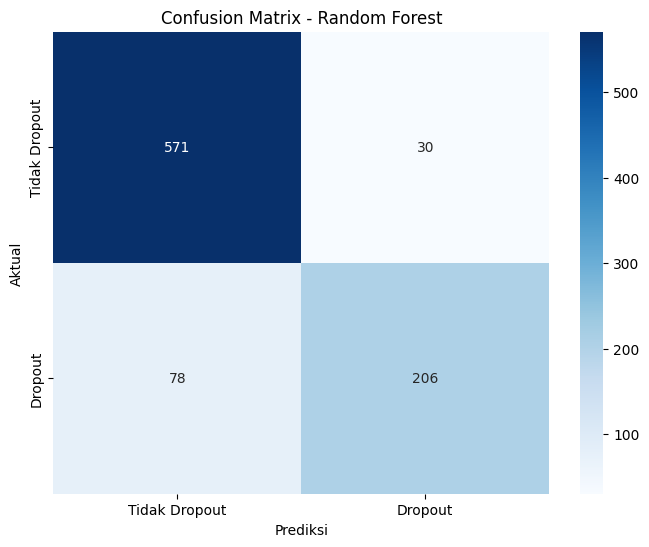

Evaluasi Model: Gradient Boosting
Accuracy: 0.8814
Precision: 0.8538
Recall: 0.7606
F1 Score: 0.8045




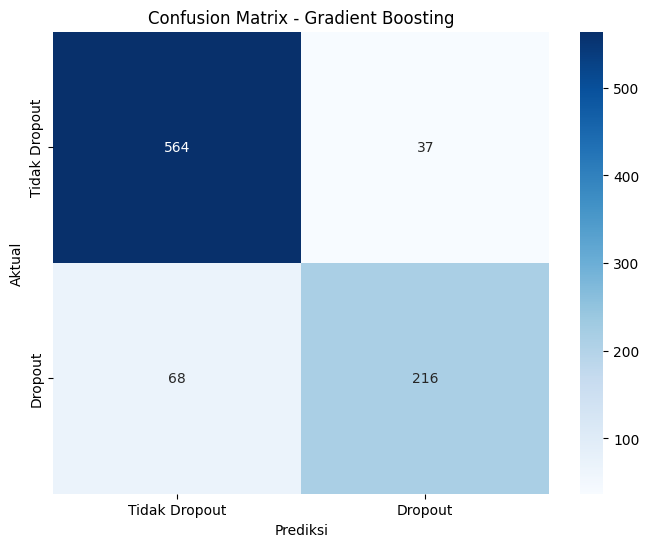

{'accuracy': 0.8813559322033898,
 'precision': np.float64(0.8537549407114624),
 'recall': np.float64(0.7605633802816901),
 'f1': np.float64(0.8044692737430168),
 'confusion_matrix': array([[564,  37],
        [ 68, 216]])}

In [39]:
# Panggil fungsi evaluate_model untuk model yang sudah dilatih
evaluate_model(dt_best, X_test, y_test, "Decision Tree")
evaluate_model(rf_best, X_test, y_test, "Random Forest")
evaluate_model(gb_best, X_test, y_test, "Gradient Boosting")


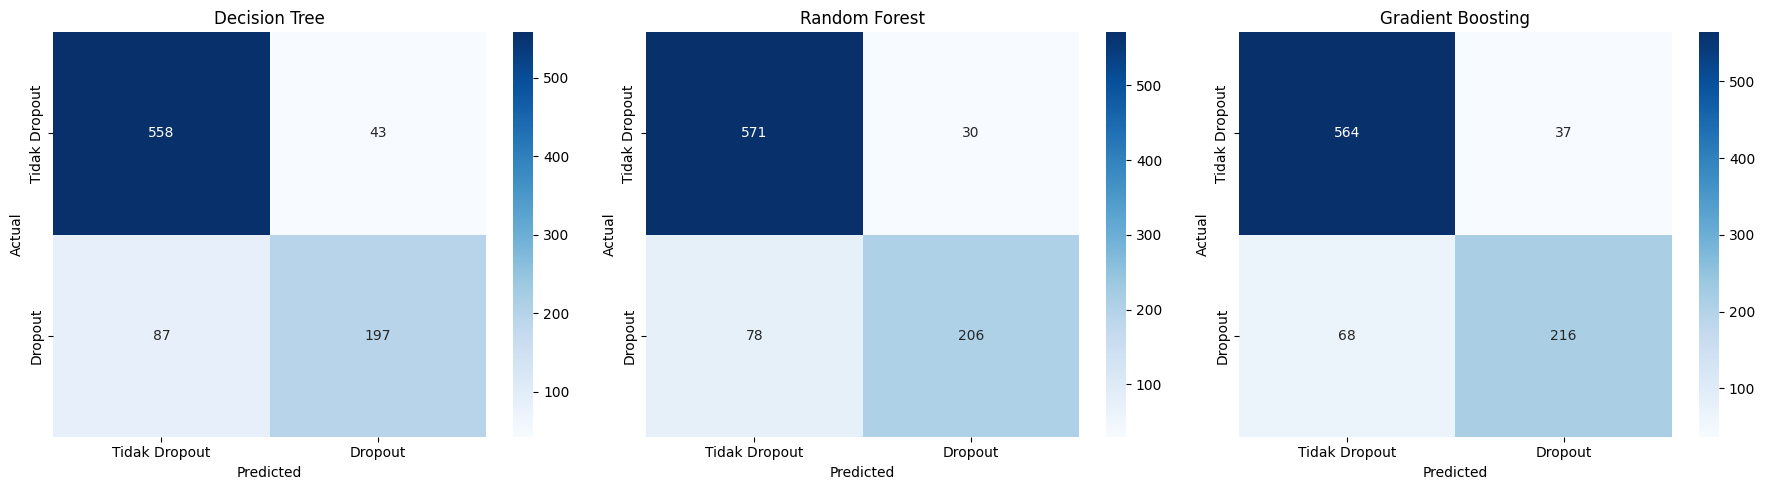

In [41]:
# Visualisasi confusion matrix untuk ketiga model dalam satu gambar
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Decision Tree
y_pred_dt = dt_best.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Tidak Dropout', 'Dropout'],
            yticklabels=['Tidak Dropout', 'Dropout'])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Decision Tree')

# Random Forest
y_pred_rf = rf_best.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Tidak Dropout', 'Dropout'],
            yticklabels=['Tidak Dropout', 'Dropout'])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Random Forest')

# Gradient Boosting
y_pred_gb = gb_best.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=axes[2],
            xticklabels=['Tidak Dropout', 'Dropout'],
            yticklabels=['Tidak Dropout', 'Dropout'])
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_title('Gradient Boosting')

plt.tight_layout()
plt.show()


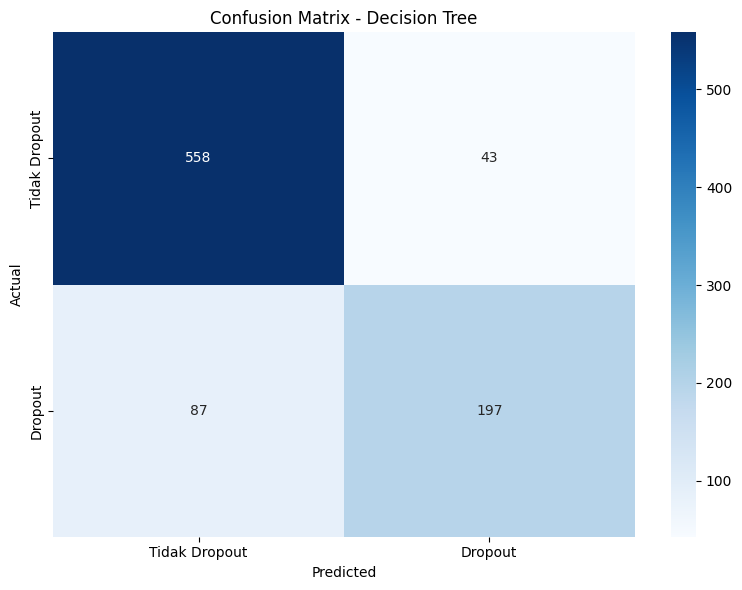

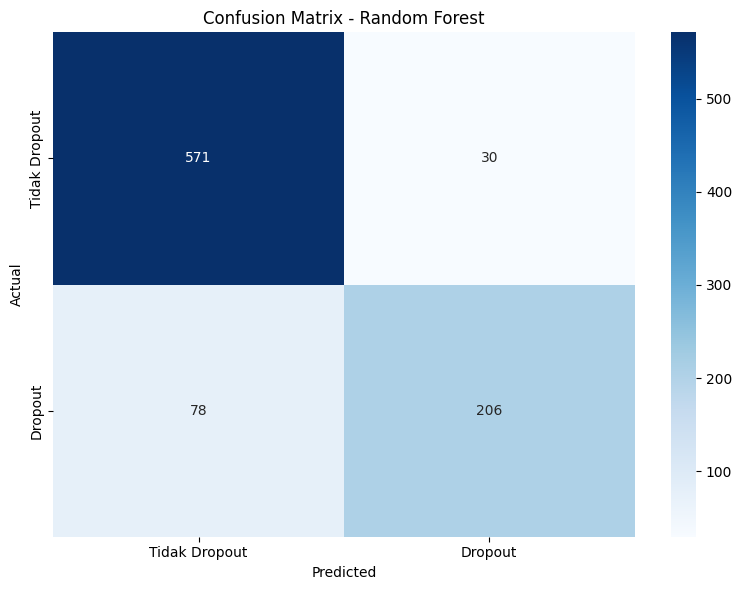

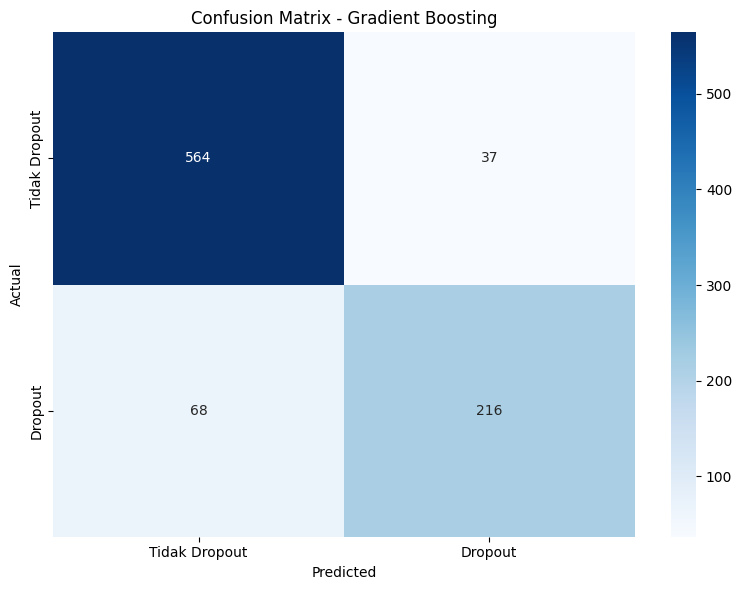

In [42]:
# Fungsi untuk visualisasi confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Tidak Dropout', 'Dropout'],
                yticklabels=['Tidak Dropout', 'Dropout'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()
    
    return cm

# Visualisasi confusion matrix untuk ketiga model
cm_dt = plot_confusion_matrix(dt_best, X_test, y_test, "Decision Tree")
cm_rf = plot_confusion_matrix(rf_best, X_test, y_test, "Random Forest")
cm_gb = plot_confusion_matrix(gb_best, X_test, y_test, "Gradient Boosting")


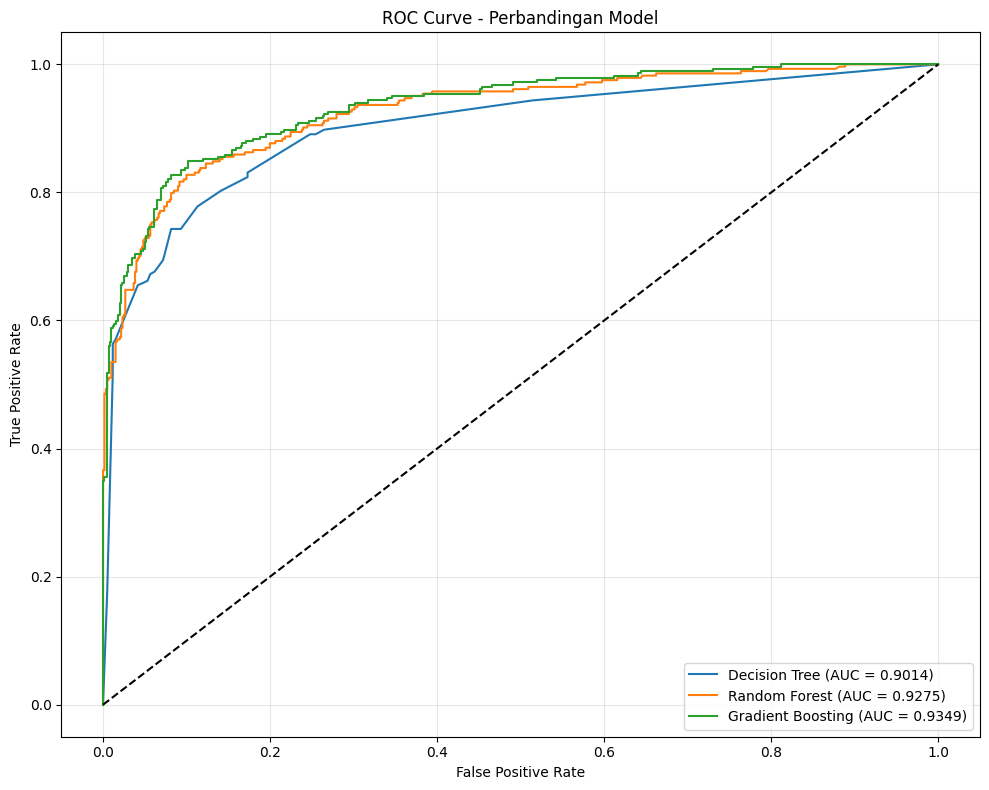

In [43]:
# ROC Curve untuk ketiga model dalam satu gambar
plt.figure(figsize=(10, 8))

# Decision Tree
y_pred_proba_dt = dt_best.predict_proba(X_test)[:, 1]
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.4f})')

# Random Forest
y_pred_proba_rf = rf_best.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')

# Gradient Boosting
y_pred_proba_gb = gb_best.predict_proba(X_test)[:, 1]
auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.4f})')

# Garis diagonal
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Perbandingan Model')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [44]:
# Classification report untuk ketiga model
models = {
    'Decision Tree': dt_best,
    'Random Forest': rf_best,
    'Gradient Boosting': gb_best
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\nClassification Report - {name}:")
    print(classification_report(y_test, y_pred, target_names=['Tidak Dropout', 'Dropout']))



Classification Report - Decision Tree:
               precision    recall  f1-score   support

Tidak Dropout       0.87      0.93      0.90       601
      Dropout       0.82      0.69      0.75       284

     accuracy                           0.85       885
    macro avg       0.84      0.81      0.82       885
 weighted avg       0.85      0.85      0.85       885


Classification Report - Random Forest:
               precision    recall  f1-score   support

Tidak Dropout       0.88      0.95      0.91       601
      Dropout       0.87      0.73      0.79       284

     accuracy                           0.88       885
    macro avg       0.88      0.84      0.85       885
 weighted avg       0.88      0.88      0.87       885


Classification Report - Gradient Boosting:
               precision    recall  f1-score   support

Tidak Dropout       0.89      0.94      0.91       601
      Dropout       0.85      0.76      0.80       284

     accuracy                           0.8

Evaluasi Model: Decision Tree
Accuracy: 0.8531
Precision: 0.8208
Recall: 0.6937
F1 Score: 0.7519




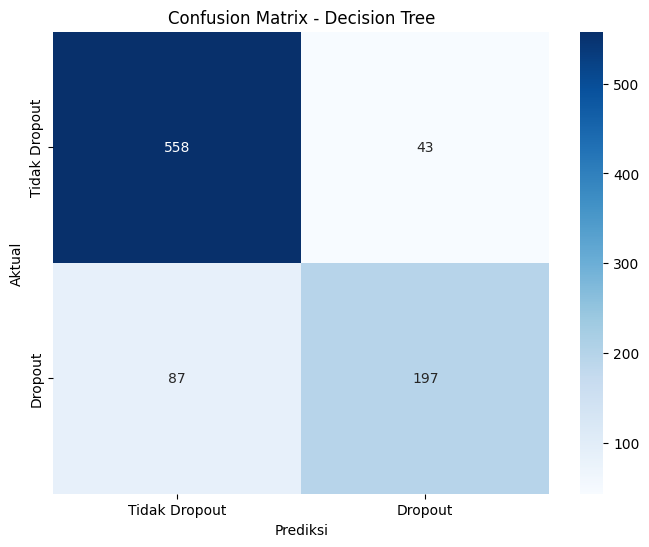

Evaluasi Model: Random Forest
Accuracy: 0.8780
Precision: 0.8729
Recall: 0.7254
F1 Score: 0.7923




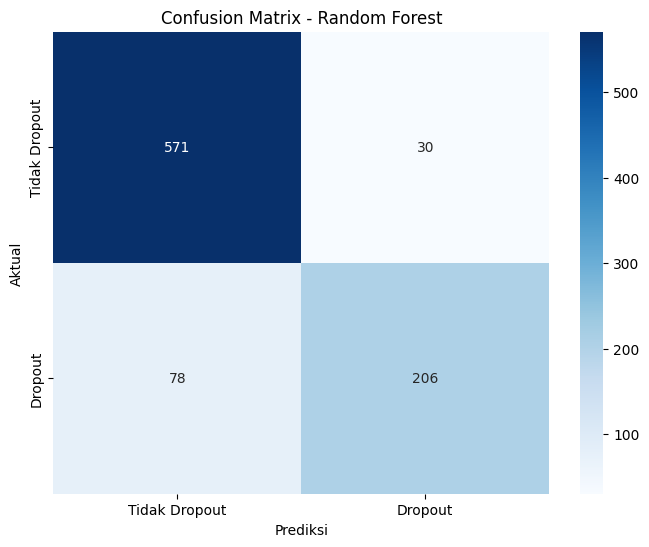

Evaluasi Model: Gradient Boosting
Accuracy: 0.8814
Precision: 0.8538
Recall: 0.7606
F1 Score: 0.8045




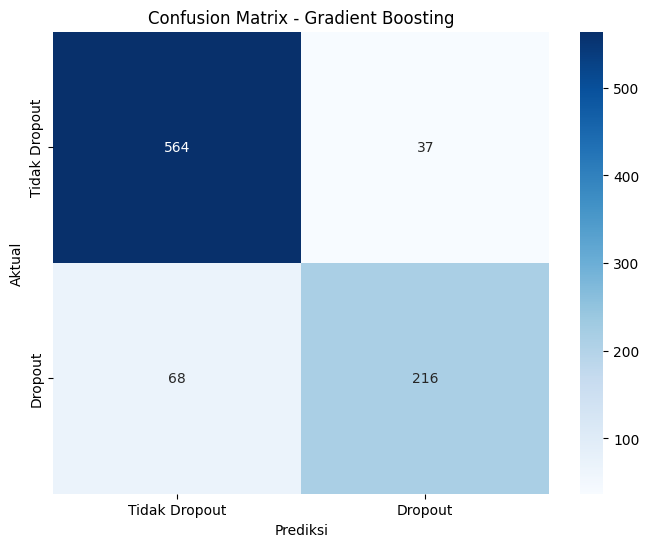

In [45]:
# Evaluasi semua model
results = []
for name, model in best_models.items():
    result = evaluate_model(model, X_test, y_test, name)
    results.append(result)


In [48]:
# Buat DataFrame perbandingan secara manual
results_df = pd.DataFrame({
    'model_name': ['Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'accuracy': [
        accuracy_score(y_test, dt_best.predict(X_test)),
        accuracy_score(y_test, rf_best.predict(X_test)),
        accuracy_score(y_test, gb_best.predict(X_test))
    ],
    'precision': [
        precision_score(y_test, dt_best.predict(X_test)),
        precision_score(y_test, rf_best.predict(X_test)),
        precision_score(y_test, gb_best.predict(X_test))
    ],
    'recall': [
        recall_score(y_test, dt_best.predict(X_test)),
        recall_score(y_test, rf_best.predict(X_test)),
        recall_score(y_test, gb_best.predict(X_test))
    ],
    'f1': [
        f1_score(y_test, dt_best.predict(X_test)),
        f1_score(y_test, rf_best.predict(X_test)),
        f1_score(y_test, gb_best.predict(X_test))
    ],
    'auc': [
        roc_auc_score(y_test, dt_best.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, gb_best.predict_proba(X_test)[:, 1])
    ]
})

# Set model_name sebagai index
results_df = results_df.set_index('model_name')

# Tampilkan hasil
print(results_df)


                   accuracy  precision    recall        f1       auc
model_name                                                          
Decision Tree      0.853107   0.820833  0.693662  0.751908  0.901417
Random Forest      0.877966   0.872881  0.725352  0.792308  0.927547
Gradient Boosting  0.881356   0.853755  0.760563  0.804469  0.934950


In [55]:
# Evaluasi model dan simpan hasilnya dalam list
results = []

# Fungsi untuk mengevaluasi model dan menambahkan hasilnya ke list
def evaluate_and_append(model, X_test, y_test, model_name, results_list):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    results_list.append({
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc
    })

# Evaluasi ketiga model
evaluate_and_append(dt_best, X_test, y_test, 'Decision Tree', results)
evaluate_and_append(rf_best, X_test, y_test, 'Random Forest', results)
evaluate_and_append(gb_best, X_test, y_test, 'Gradient Boosting', results)

# Buat DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.set_index('model_name')

# Tampilkan hasil
print(results_df)


                   accuracy  precision    recall        f1       auc
model_name                                                          
Decision Tree      0.853107   0.820833  0.693662  0.751908  0.901417
Random Forest      0.877966   0.872881  0.725352  0.792308  0.927547
Gradient Boosting  0.881356   0.853755  0.760563  0.804469  0.934950


<Figure size 1400x800 with 0 Axes>

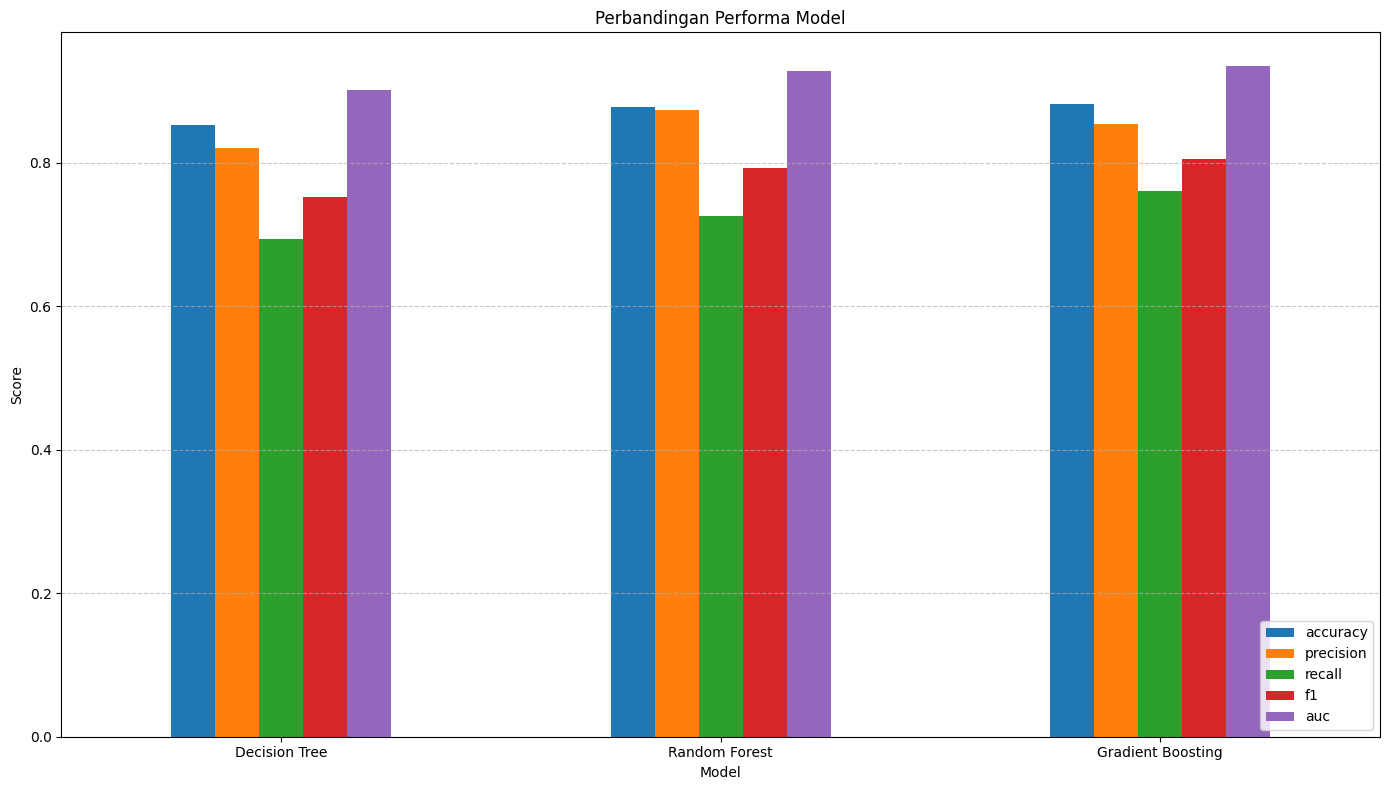

In [50]:

# Visualisasi perbandingan model
plt.figure(figsize=(14, 8))
results_df.plot(kind='bar', figsize=(14, 8))
plt.title('Perbandingan Performa Model')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [51]:
# Menentukan model terbaik berdasarkan F1 Score
best_model_idx = results_df['f1'].idxmax()
print(f"\nModel terbaik berdasarkan F1 Score adalah {best_model_idx} dengan F1 Score {results_df.loc[best_model_idx, 'f1']:.4f}")



Model terbaik berdasarkan F1 Score adalah Gradient Boosting dengan F1 Score 0.8045


Model adalah pipeline. Mengakses classifier di dalam pipeline...
Fitur asli: 38
Fitur setelah transformasi: 38


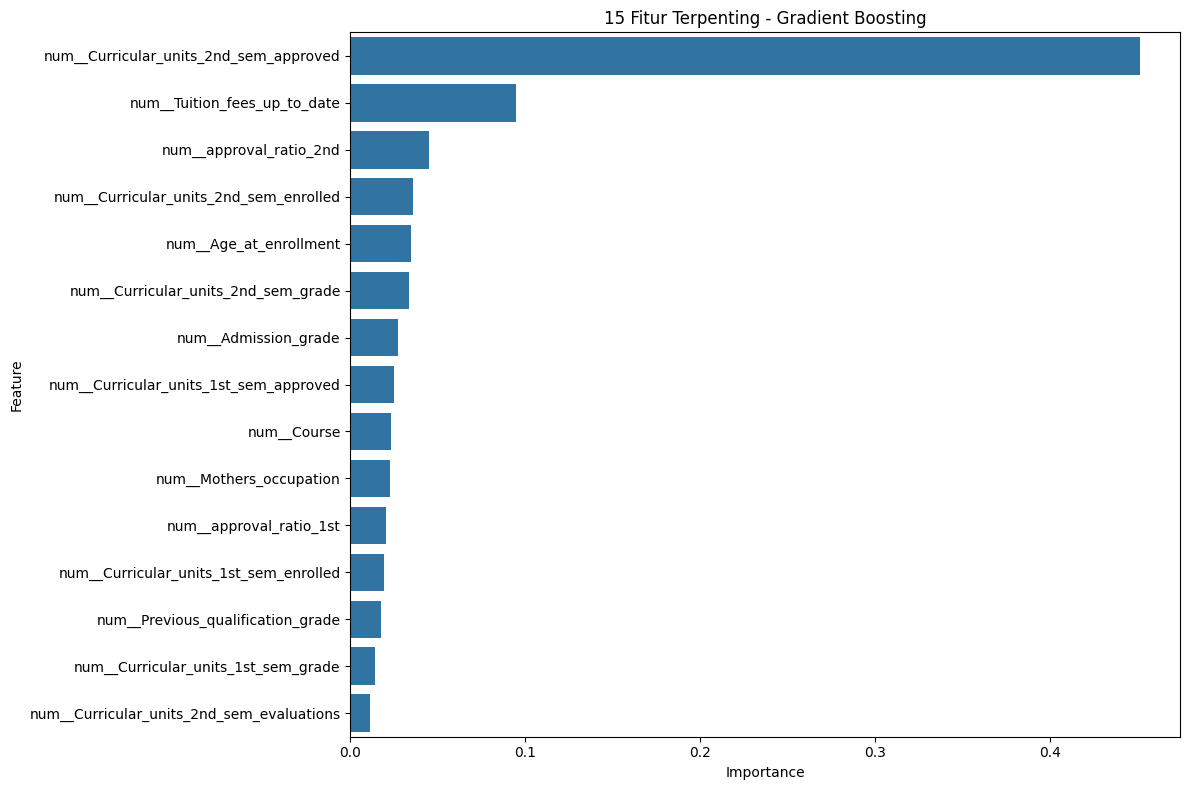


Fitur Terpenting - Gradient Boosting:
                                      Feature  Importance
30     num__Curricular_units_2nd_sem_approved    0.451946
16               num__Tuition_fees_up_to_date    0.094658
37                    num__approval_ratio_2nd    0.044940
28     num__Curricular_units_2nd_sem_enrolled    0.035893
19                     num__Age_at_enrollment    0.034605
31        num__Curricular_units_2nd_sem_grade    0.033696
12                       num__Admission_grade    0.026984
24     num__Curricular_units_1st_sem_approved    0.025197
3                                 num__Course    0.023355
10                    num__Mothers_occupation    0.022838
36                    num__approval_ratio_1st    0.020591
22     num__Curricular_units_1st_sem_enrolled    0.019100
6           num__Previous_qualification_grade    0.017754
25        num__Curricular_units_1st_sem_grade    0.013947
29  num__Curricular_units_2nd_sem_evaluations    0.011458

Feature importances telah disimp

In [56]:
# Analisis fitur penting untuk Gradient Boosting
best_model = gb_best  

try:
    # Jika model adalah pipeline dengan preprocessor
    if hasattr(best_model, 'named_steps'):
        print("Model adalah pipeline. Mengakses classifier di dalam pipeline...")
        # Dapatkan classifier dari pipeline
        classifier = best_model.named_steps['classifier']
        # Dapatkan feature importances dari classifier
        importances = classifier.feature_importances_
        
        # Coba dapatkan feature names
        if hasattr(X_train, 'columns'):
            # Jika X_train adalah DataFrame dengan nama kolom
            original_feature_names = X_train.columns.tolist()
            print(f"Fitur asli: {len(original_feature_names)}")
            
            # Dapatkan transformer dari pipeline
            preprocessor = best_model.named_steps['preprocessor']
            
            # Coba dapatkan feature names setelah transformasi
            try:
                # Untuk scikit-learn versi baru
                if hasattr(preprocessor, 'get_feature_names_out'):
                    transformed_feature_names = preprocessor.get_feature_names_out()
                    print(f"Fitur setelah transformasi: {len(transformed_feature_names)}")
                    feature_names = transformed_feature_names
                else:
                    # Fallback ke nama generik
                    print("Preprocessor tidak memiliki metode get_feature_names_out")
                    feature_names = [f"Feature_{i}" for i in range(len(importances))]
            except Exception as e:
                print(f"Error saat mendapatkan feature names dari preprocessor: {str(e)}")
                feature_names = [f"Feature_{i}" for i in range(len(importances))]
        else:
            # Jika X_train bukan DataFrame atau tidak memiliki nama kolom
            feature_names = [f"Feature_{i}" for i in range(len(importances))]
    else:
        # Jika model bukan pipeline
        importances = best_model.feature_importances_
        if hasattr(X_train, 'columns'):
            feature_names = X_train.columns.tolist()
        else:
            feature_names = [f"Feature_{i}" for i in range(len(importances))]
    
    # Periksa apakah jumlah feature names sama dengan jumlah importances
    if len(feature_names) != len(importances):
        print(f"Jumlah nama fitur ({len(feature_names)}) tidak sama dengan jumlah feature importances ({len(importances)})")
        feature_names = [f"Feature_{i}" for i in range(len(importances))]
    
except Exception as e:
    print(f"Error saat mendapatkan feature importances: {str(e)}")
    # Fallback jika tidak bisa mendapatkan feature importances
    importances = np.ones(X_train.shape[1]) / X_train.shape[1]  # Equal importance
    feature_names = [f"Feature_{i}" for i in range(len(importances))]

# Buat DataFrame feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Visualisasi fitur penting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title('15 Fitur Terpenting - Gradient Boosting')
plt.tight_layout()
plt.show()

print("\nFitur Terpenting - Gradient Boosting:")
print(feature_importances.head(15))

# Jika Anda ingin menyimpan feature importances untuk digunakan nanti
feature_info = {
    'feature_importances': feature_importances.to_dict(),
    'top_features': feature_importances.head(15)['Feature'].tolist()
}

# Simpan feature info
joblib.dump(feature_info, 'models/feature_info.joblib')
print("\nFeature importances telah disimpan ke 'models/feature_info.joblib'")


# Rekomendasi dari Model Prediksi Dropout Mahasiswa

## Insight Utama dari Hasil Modeling

1. **Performa Model**: Model terbaik adalah Gradient Boosting dengan F1 Score 0.8045, menunjukkan kemampuan yang baik dalam memprediksi mahasiswa yang berisiko dropout.

2. **Faktor Akademik Dominan**: Berdasarkan analisis fitur penting, performa akademik di semester kedua (terutama jumlah unit kurikuler yang disetujui) menjadi prediktor terkuat untuk risiko dropout, dengan kontribusi 45% terhadap prediksi model.

3. **Pengaruh Faktor Keuangan**: Status pembayaran biaya kuliah (Tuition_fees_up_to_date) memiliki pengaruh signifikan dengan kontribusi 9.5%, menunjukkan bahwa kesulitan finansial merupakan faktor penting dalam keputusan untuk putus sekolah.

4. **Rasio Kelulusan**: Rasio kelulusan di semester kedua (approval_ratio_2nd) berkontribusi 4.5% terhadap prediksi, menegaskan pentingnya keberhasilan akademik berkelanjutan.

5. **Faktor Demografis**: Usia saat pendaftaran (Age_at_enrollment) memiliki pengaruh signifikan dengan kontribusi 3.5%, menunjukkan variasi risiko dropout berdasarkan kelompok usia.

6. **Nilai Akademik**: Nilai di semester kedua (Curricular_units_2nd_sem_grade) dan nilai masuk (Admission_grade) juga menjadi faktor penting dengan kontribusi masing-masing 3.4% dan 2.7%.

7. **Keseimbangan Precision-Recall**: Model terbaik mencapai keseimbangan yang baik antara precision dan recall, mengurangi risiko false positive (mengidentifikasi mahasiswa sebagai berisiko padahal tidak) dan false negative (gagal mengidentifikasi mahasiswa yang benar-benar berisiko).

## Rekomendasi Berdasarkan Hasil Modeling

### 1. Implementasi Sistem Peringatan Dini
- Terapkan model prediksi sebagai sistem peringatan dini otomatis yang mengidentifikasi mahasiswa berisiko dropout di akhir semester kedua
- Buat dashboard monitoring untuk staf akademik dengan visualisasi tingkat risiko mahasiswa
- Kembangkan protokol tindak lanjut yang jelas untuk mahasiswa yang teridentifikasi berisiko tinggi

### 2. Intervensi Akademik Terstruktur
- Berikan dukungan akademik tambahan untuk mahasiswa dengan jumlah unit kurikuler yang disetujui rendah di semester kedua
- Kembangkan program mentoring dan tutoring khusus untuk meningkatkan rasio kelulusan
- Terapkan checkpoint reguler sepanjang semester untuk mengidentifikasi kesulitan akademik lebih awal

### 3. Dukungan Keuangan Terarah
- Tingkatkan program beasiswa dan bantuan keuangan untuk mahasiswa yang mengalami kesulitan membayar biaya kuliah tepat waktu
- Kembangkan opsi pembayaran fleksibel untuk mahasiswa dengan kesulitan keuangan
- Sediakan konseling keuangan dan perencanaan anggaran untuk membantu mahasiswa mengelola biaya pendidikan

### 4. Program Dukungan Demografis
- Buat program dukungan khusus untuk kelompok usia tertentu yang berisiko tinggi
- Kembangkan komunitas belajar untuk meningkatkan rasa memiliki dan keterlibatan
- Tawarkan layanan konseling dan dukungan yang disesuaikan dengan kebutuhan spesifik kelompok demografis tertentu

### 5. Reformasi Program Studi Berisiko Tinggi
- Evaluasi kurikulum dan metode pengajaran pada program studi dengan tingkat dropout tinggi
- Terapkan perubahan struktural pada program-program tersebut berdasarkan praktik terbaik dari program dengan tingkat keberhasilan tinggi
- Pertimbangkan untuk menambahkan prasyarat atau orientasi khusus untuk program-program yang menantang

### 6. Pengembangan Keterlibatan Mahasiswa
- Tingkatkan kesempatan untuk keterlibatan mahasiswa melalui kegiatan ekstrakurikuler dan organisasi kampus
- Kembangkan program yang memperkuat hubungan antara mahasiswa dan fakultas
- Ciptakan lingkungan belajar yang inklusif dan mendukung untuk semua mahasiswa

### 7. Pemantauan dan Evaluasi Berkelanjutan
- Lakukan evaluasi berkala terhadap efektivitas intervensi yang diimplementasikan
- Perbarui model prediksi secara reguler dengan data terbaru untuk meningkatkan akurasi
- Kembangkan metrik keberhasilan yang jelas untuk mengukur dampak program intervensi
- Lakukan analisis longitudinal untuk memahami efek jangka panjang dari intervensi

### 8. Pengembangan Kebijakan Institusional
- Integrasikan temuan dari model prediksi ke dalam perencanaan strategis institusi
- Alokasikan sumber daya berdasarkan kebutuhan yang diidentifikasi oleh model
- Kembangkan kebijakan retensi yang komprehensif berdasarkan data dan bukti empiris
- Dorong kolaborasi antar departemen untuk mengatasi masalah dropout secara holistik


In [51]:
pip install pandas psycopg2-binary sqlalchemy



   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   ------------------ --------------------- 0.5/1.2 MB 699.0 kB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.2 MB 699.0 kB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.2 MB 699.0 kB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.2 MB 550.1 kB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.2 MB 550.1 kB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.2 MB 550.1 kB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.2 MB 550.1 kB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.2 MB 550.1 kB/s eta 0:00:01
   ------------------------------------ --- 1.0/1.2 MB 375.6 kB/s eta 0:00:01
   ------------------

In [53]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import io

# Baca file CSV
df = pd.read_csv('Data/students_performance.csv', delimiter=';')

# Tampilkan informasi dataframe untuk memastikan data dibaca dengan benar
print("Informasi DataFrame:")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\nContoh data:")
print(df.head())

# Konfigurasi koneksi ke Supabase PostgreSQL
host = "aws-0-ap-southeast-1.pooler.supabase.com"
port = "6543"
database = "postgres"
user = "postgres.aytsnmlhjcqtpvhtrqqt"
password = "dicoding1"

# Buat connection string
conn_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"

# Buat engine SQLAlchemy
engine = create_engine(conn_string)

# Upload dataframe ke database
# Nama tabel: students_performance
# Schema: public (default schema di PostgreSQL)
# Jika tabel sudah ada, ganti dengan data baru (replace)
# Index dari pandas tidak diupload (index=False)
try:
    df.to_sql('students_performance', engine, schema='public', if_exists='replace', index=False)
    print(f"Data berhasil diupload ke tabel 'students_performance' di database 'edutech'")
    print(f"Jumlah baris yang diupload: {df.shape[0]}")
except Exception as e:
    print(f"Error saat mengupload data: {e}")

# Verifikasi data yang diupload
try:
    # Buat koneksi langsung ke PostgreSQL
    conn = psycopg2.connect(
        host=host,
        port=port,
        database=database,
        user=user,
        password=password
    )
    
    # Buat cursor
    cursor = conn.cursor()
    
    # Jalankan query untuk menghitung jumlah baris
    cursor.execute("SELECT COUNT(*) FROM students_performance")
    
    # Ambil hasil
    count = cursor.fetchone()[0]
    
    print(f"\nVerifikasi data:")
    print(f"Jumlah baris di tabel database: {count}")
    
    # Ambil beberapa baris untuk verifikasi
    cursor.execute("SELECT * FROM students_performance LIMIT 5")
    rows = cursor.fetchall()
    
    print("\nContoh data di database:")
    for row in rows:
        print(row)
    
    # Tutup cursor dan koneksi
    cursor.close()
    conn.close()
    
except Exception as e:
    print(f"Error saat verifikasi data: {e}")


Informasi DataFrame:
Jumlah baris: 4424
Jumlah kolom: 37

Contoh data:
   Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1   